## 1. Biblioteki

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os
import talos as ta
from talos.model.early_stopper import early_stopper

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
%load_ext tensorboard


from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.model_selection import train_test_split


Using TensorFlow backend.



## 2. Dane

In [42]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["IE"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

caly_df.shape

(1881, 26)

In [43]:
caly_df.head()

,Województwo,Data urodzenia,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
0,WIELKOPOLSKIE,2020,137,127,121,113,106,128,109,107,...,1370,577,2,452,1,115.0,114.0,109.0,127.0,123.0
1,KUJAWSKO-POMORSKIE,2018,126,123,109,113,103,128,114,114,...,1209,358,-16,354,-4,115.0,113.0,104.0,123.0,123.0
2,POMORSKIE,2020,126,120,110,107,102,124,113,112,...,982,368,-4,350,4,104.0,103.0,102.0,122.0,117.0
3,KUJAWSKO-POMORSKIE,2020,133,111,104,110,99,114,114,113,...,1080,546,12,410,7,106.0,106.0,101.0,112.0,112.0
4,ZACHODNIOPOMORSKIE,2020,125,115,91,95,101,124,134,129,...,516,501,36,289,15,102.0,102.0,118.0,123.0,109.0


In [44]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   PI-PROD         1881 non-null   int64   
 3   PI-POKR         1881 non-null   int64   
 4   Prc             1881 non-null   int64   
 5   Psm             1881 non-null   int64   
 6   Pnr             1881 non-null   int64   
 7   Pw              1881 non-null   int64   
 8   PI-PLOD         1881 non-null   int64   
 9   CRj             1881 non-null   int64   
 10  CRk             1881 non-null   int64   
 11  PP              1881 non-null   int64   
 12  OMC             1881 non-null   int64   
 13  WH-KSOM         1881 non-null   int64   
 14  WH-DLUG         1881 non-null   int64   
 15  IP              1881 non-null   int64   
 16  kg ml           1881 non-null   int64   
 17  kg tł          

## 3. Usuwam mniejszości zmiennych kategorycznych

In [45]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [46]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [47]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [48]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [49]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [50]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [51]:
caly_df.shape

(1875, 26)

## 4. Zakodowuje zmienne kategoryczne

In [52]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

## 5. Klasyfikuje wartosci IE

Text(0, 0.5, 'Frequency')

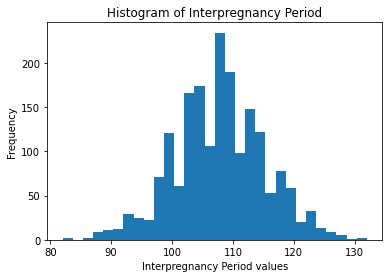

In [55]:
plt.hist(caly_df["OMC"],bins=30)
plt.title('Histogram of Interpregnancy Period')
plt.xlabel('Interpregnancy Period values')
plt.ylabel('Frequency')


In [14]:
caly_df["OMC"].describe()

count    1875.000000
mean      107.665067
std         7.413236
min        82.000000
25%       103.000000
50%       107.000000
75%       112.000000
max       132.000000
Name: OMC, dtype: float64

In [15]:
caly_df.loc[(caly_df["OMC"]<=103), "Klasa"] = "Małe"
caly_df.loc[(103<caly_df["OMC"]) & (caly_df["OMC"]<=107), "Klasa"] = "Średnie"
caly_df.loc[(107<caly_df["OMC"]) & (caly_df["OMC"]<=112), "Klasa"] = "Wysokie"
caly_df.loc[caly_df["OMC"]>112, "Klasa"] = "Ekstrimum"

(array([415.,   0.,   0., 531.,   0.,   0., 465.,   0.,   0., 464.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

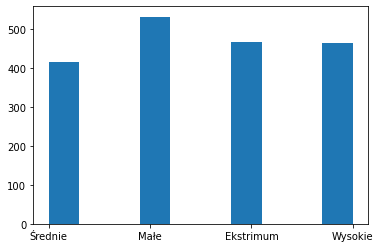

In [16]:
plt.hist(caly_df["Klasa"])

In [17]:
caly_df["Klasa"].value_counts()

Małe         531
Ekstrimum    465
Wysokie      464
Średnie      415
Name: Klasa, dtype: int64

In [18]:
list(caly_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 'Klasa']

In [19]:
train_df, test_df = train_test_split(caly_df, test_size=0.2, random_state=42,stratify=caly_df['Klasa'])
#test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42,stratify=test_df['Klasa'])

del train_df['Klasa']
del test_df['Klasa']
#del val_df['Klasa']


train_label=train_df['OMC']
test_label=test_df['OMC']
#val_label=val_df['IE']

del train_df['OMC']
del test_df['OMC']
#del val_df['IE']


In [20]:
list(train_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [21]:
len(list(train_df))

46

## 1.2 Standaryzacja

In [22]:
train_df.iloc[:,:23]

,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,PP,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
1119,133,115,105,107,111,113,104,105,103,96,...,1325,474,-8,429,0,107.0,109.0,117.0,111.0,114.0
1093,125,117,115,104,98,123,120,118,120,99,...,478,523,41,288,16,106.0,101.0,106.0,120.0,111.0
613,123,119,101,108,103,124,116,114,116,102,...,1091,418,-3,287,-8,107.0,107.0,112.0,125.0,118.0
3,131,113,98,100,103,117,115,113,116,102,...,902,516,17,378,10,105.0,103.0,110.0,118.0,109.0
816,121,112,105,94,103,116,120,117,122,99,...,1040,379,-5,270,-8,90.0,93.0,100.0,117.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,129,113,90,100,100,121,120,116,121,105,...,843,602,30,316,5,101.0,100.0,114.0,121.0,111.0
608,126,118,108,108,110,116,113,107,113,117,...,783,374,6,348,11,108.0,107.0,117.0,115.0,113.0
273,125,111,96,108,107,111,109,108,107,104,...,983,398,0,321,0,107.0,106.0,116.0,115.0,111.0
1478,128,109,108,111,104,106,115,114,119,93,...,888,491,15,339,6,108.0,108.0,105.0,108.0,111.0


In [23]:
scaler = StandardScaler()
train_df.iloc[:,:23]=scaler.fit_transform(train_df.iloc[:,:23])
test_df.iloc[:,:23]=scaler.fit_transform(test_df.iloc[:,:23])
#val_df.iloc[:,14:]=scaler.fit_transform(val_df.iloc[:,14:])

In [24]:
train_df.iloc[:,20:23]

,nr,w,og
1119,0.680709,-1.138843,-0.140075
1093,-0.819652,0.104636,-0.584915
613,-0.001273,0.795458,0.453044
3,-0.274066,-0.171692,-0.881474
816,-1.638030,-0.309857,-1.178034
...,...,...,...
110,0.271520,0.242801,-0.584915
608,0.680709,-0.586185,-0.288355
273,0.544313,-0.586185,-0.584915
1478,-0.956048,-1.553336,-0.584915


In [25]:
train_df.shape

(1500, 46)

In [26]:
test_df.shape

(375, 46)

In [27]:
train_df = np.array(train_df)
test_df = np.array(test_df)

In [28]:
train_df

array([[ 0.93447873, -0.3516274 , -0.26760885, ...,  1.        ,
         0.        ,  0.        ],
       [-0.31999546, -0.07017537,  0.99231982, ...,  1.        ,
         0.        ,  0.        ],
       [-0.63361401,  0.21127666, -0.77158032, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.31999546, -0.91453145, -1.40154465, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15043236, -1.19598348,  0.11036975, ...,  1.        ,
         0.        ,  0.        ],
       [-0.16318618, -1.19598348, -2.40948759, ...,  0.        ,
         1.        ,  0.        ]])

In [29]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [30]:
train_label

array([ 97, 104, 103, ..., 104, 101, 102], dtype=int64)

In [31]:
METRICS=['mae']

# 2 Moduł TALOS

Zamiast dobierać wszystkie hiperparametry na nowo, sprawdzę czy siec preferuje inne w waskim zakresie

## 2.1 Słownik parametrów do wypróbowania

In [32]:
p = {'first_neuron':[160], #
     'hidden_neuron':[25],#
     'hidden_layers':[1],  #1 must
     'batch_size': [64], # 64
     'optimizer': ['adamax'],# do zrobienia potem
     'kernel_initializer': ['ones'], # ones 
     'epochs': [20000], # never touch it
     'dropout': [0.2,0],  # po dopasowaniu znowu nie bedzie potrzebne
     'activation_layer':['selu'], # selu
     'batc_normalization':[False], # do zrobienia potem
     'last_activation': ['linear']} #never touch it
#     
#     
#    

## 2.2 Tworzę funkcję do tworzenia instancji modelu keras

In [33]:
def numerai_model(x_train, y_train, x_val, y_val, params):
    print(params)

    model = Sequential()
    
    ## initial layer
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer = params['kernel_initializer'] ))
    if params['batc_normalization']==True:
        model.add(BatchNormalization())
    model.add(Dropout(params['dropout']))
    
    ## hidden layers
    for i in range(params['hidden_layers']):
        print (f"adding layer {i+1}")
        model.add(Dense(params['hidden_neuron'], activation='relu',
                    kernel_initializer=params['kernel_initializer']))
        if params['batc_normalization']==True:
            model.add(BatchNormalization())
        model.add(Dropout(params['dropout']))
    
    
    ## final layer
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss='mean_absolute_error', 
                  optimizer=params['optimizer'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        callbacks = [early_stopper(params['epochs'], patience=5,monitor='val_loss')] #,ta.live(),
                        )

    return history, model

## 2.3 Przeprowadzam skan, używając parametrów i funkcji wyżej


In [34]:
t = ta.Scan(x=train_df, y=train_label,
            x_val=test_df, y_val=test_label,
            model=numerai_model,
            params=p,
            experiment_name='Predykcja OMC')

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0.2, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'adamax'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 2s 1ms/sample - loss: 18706.7755 - val_loss: 16943.7493
Epoch 2/20000
1500/1500 [==============================] - 0s 57us/sample - loss: 17717.3557 - val_loss: 16112.4187
Epoch 3/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 17009.2495 - val_loss: 15376.4504
Epoch 4/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 16237.6903 - val_loss: 14681.9301
Epoch 5/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 15453.1347 - val_loss: 14008.1912
Epoch 6/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 14898.9443 - val_loss: 1

1500/1500 [==============================] - 0s 25us/sample - loss: 78.3365 - val_loss: 80.6360
Epoch 143/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 78.0209 - val_loss: 80.5893
Epoch 144/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 78.6233 - val_loss: 80.5289
Epoch 145/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 78.2694 - val_loss: 80.7155
Epoch 146/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 77.7381 - val_loss: 80.6306
Epoch 147/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 78.4809 - val_loss: 80.6852
Epoch 148/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 78.0035 - val_loss: 80.6169
Epoch 149/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 78.1021 - val_loss: 80.8518
Epoch 150/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 77.9451 - val_loss: 80.2781
Epoch 15

1500/1500 [==============================] - 0s 26us/sample - loss: 33.2675 - val_loss: 26.3598
Epoch 289/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 32.1202 - val_loss: 25.0104
Epoch 290/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 30.5981 - val_loss: 23.9666
Epoch 291/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 30.1002 - val_loss: 23.1453
Epoch 292/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 29.5105 - val_loss: 22.1090
Epoch 293/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 27.9142 - val_loss: 21.4269
Epoch 294/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 27.6340 - val_loss: 20.5736
Epoch 295/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 26.4478 - val_loss: 19.9509
Epoch 296/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 26.4998 - val_loss: 19.4484
Epoch 29

Epoch 435/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.6390 - val_loss: 2.7569
Epoch 436/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.7599 - val_loss: 3.3199
Epoch 437/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 10.7270 - val_loss: 3.1452
Epoch 438/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.6087 - val_loss: 2.5140
Epoch 439/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.7409 - val_loss: 2.4981
Epoch 440/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.2364 - val_loss: 2.4830
Epoch 441/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.7333 - val_loss: 3.6959
Epoch 442/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.4838 - val_loss: 3.1054
Epoch 443/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.3256 - val_loss: 3.0765
E

Epoch 509/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.1278 - val_loss: 3.8060
Epoch 510/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 10.0522 - val_loss: 2.5850
Epoch 511/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.0793 - val_loss: 2.2205
Epoch 512/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 9.8138 - val_loss: 2.5019
Epoch 513/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.1279 - val_loss: 2.3266
Epoch 514/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.7432 - val_loss: 3.1370
Epoch 515/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.0233 - val_loss: 2.0929
Epoch 516/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10.3019 - val_loss: 2.1271
Epoch 517/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.6304 - val_loss: 3.2113
Epoc

1500/1500 [==============================] - 0s 25us/sample - loss: 9.5794 - val_loss: 2.4797
Epoch 658/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.6794 - val_loss: 2.6919
Epoch 659/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.8625 - val_loss: 2.2950
Epoch 660/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.6583 - val_loss: 2.3780
Epoch 661/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.3670 - val_loss: 2.8942
Epoch 662/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.4837 - val_loss: 2.5807
Epoch 663/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.5872 - val_loss: 2.7353
Epoch 664/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.1783 - val_loss: 2.3953
Epoch 665/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.7714 - val_loss: 2.0194
Epoch 666/20000
1500/1500 

1500/1500 [==============================] - 0s 25us/sample - loss: 9.2934 - val_loss: 2.6252
Epoch 806/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.1752 - val_loss: 2.3323
Epoch 807/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.0952 - val_loss: 2.0120
Epoch 808/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.2873 - val_loss: 2.4621
Epoch 809/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.4719 - val_loss: 3.1242
Epoch 810/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.2428 - val_loss: 2.0659
Epoch 811/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.3865 - val_loss: 2.0194
Epoch 812/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.5089 - val_loss: 2.2984
Epoch 813/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 9.6735 - val_loss: 2.4162
Epoch 814/20000
1500/1500 

1500/1500 [==============================] - 0s 27us/sample - loss: 9.3374 - val_loss: 2.1226
Epoch 954/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 9.4126 - val_loss: 2.2757
Epoch 955/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 9.2983 - val_loss: 2.0565
Epoch 956/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 9.0606 - val_loss: 2.6035
Epoch 957/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.4014 - val_loss: 2.1379
Epoch 958/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8582 - val_loss: 2.0237
Epoch 959/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 9.0930 - val_loss: 2.1251
Epoch 960/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.1916 - val_loss: 2.1943
Epoch 961/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.0999 - val_loss: 3.5318
Epoch 962/20000
1500/1500 

Epoch 1101/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8483 - val_loss: 3.0812
Epoch 1102/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.0655 - val_loss: 3.4160
Epoch 1103/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.0991 - val_loss: 2.4436
Epoch 1104/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.1803 - val_loss: 3.3249
Epoch 1105/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.0144 - val_loss: 3.5193
Epoch 1106/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7724 - val_loss: 3.8906
Epoch 1107/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.1343 - val_loss: 2.8035
Epoch 1108/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8536 - val_loss: 3.5605
Epoch 1109/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7895 - val_loss: 2.3461
E

Epoch 1175/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.7789 - val_loss: 2.6945
Epoch 1176/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7774 - val_loss: 2.1193
Epoch 1177/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8632 - val_loss: 2.3180
Epoch 1178/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7308 - val_loss: 2.0181
Epoch 1179/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3750 - val_loss: 2.8173
Epoch 1180/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 9.0162 - val_loss: 3.1936
Epoch 1181/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.0836 - val_loss: 2.1045
Epoch 1182/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 8.9533 - val_loss: 2.2740
Epoch 1183/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7838 - val_loss: 3.2247
E

Epoch 1249/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7537 - val_loss: 2.0008
Epoch 1250/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 8.9713 - val_loss: 2.4029
Epoch 1251/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6958 - val_loss: 2.5219
Epoch 1252/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 8.9563 - val_loss: 3.1685
Epoch 1253/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 8.6775 - val_loss: 2.2129
Epoch 1254/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 9.0784 - val_loss: 2.9954
Epoch 1255/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8201 - val_loss: 1.8019
Epoch 1256/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 9.0723 - val_loss: 2.6223
Epoch 1257/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7136 - val_loss: 1.9044
E

Epoch 1323/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7505 - val_loss: 1.9880
Epoch 1324/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8277 - val_loss: 2.8701
Epoch 1325/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8020 - val_loss: 2.5185
Epoch 1326/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4268 - val_loss: 2.5715
Epoch 1327/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7548 - val_loss: 1.7534
Epoch 1328/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7736 - val_loss: 2.0107
Epoch 1329/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4939 - val_loss: 2.3807
Epoch 1330/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8327 - val_loss: 2.7471
Epoch 1331/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.6082 - val_loss: 2.3840
E

Epoch 1397/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8834 - val_loss: 2.5268
Epoch 1398/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4365 - val_loss: 2.3424
Epoch 1399/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6494 - val_loss: 2.0478
Epoch 1400/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7887 - val_loss: 3.3802
Epoch 1401/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6937 - val_loss: 2.3929
Epoch 1402/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7516 - val_loss: 2.9907
Epoch 1403/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8896 - val_loss: 2.8259
Epoch 1404/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5058 - val_loss: 1.8883
Epoch 1405/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5894 - val_loss: 2.2418
E

Epoch 1471/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.3974 - val_loss: 2.2415
Epoch 1472/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7011 - val_loss: 1.8520
Epoch 1473/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7251 - val_loss: 2.2508
Epoch 1474/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8866 - val_loss: 1.9397
Epoch 1475/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.9686 - val_loss: 2.3062
Epoch 1476/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6370 - val_loss: 2.0427
Epoch 1477/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7027 - val_loss: 2.0867
Epoch 1478/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6748 - val_loss: 3.8470
Epoch 1479/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 9.1178 - val_loss: 2.3672
E

Epoch 1545/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5794 - val_loss: 2.3075
Epoch 1546/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8046 - val_loss: 1.9583
Epoch 1547/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 8.7891 - val_loss: 2.0730
Epoch 1548/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8585 - val_loss: 2.4065
Epoch 1549/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4653 - val_loss: 1.9413
Epoch 1550/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5975 - val_loss: 2.0834
Epoch 1551/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 8.5024 - val_loss: 3.0292
Epoch 1552/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5869 - val_loss: 2.2138
Epoch 1553/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.5138 - val_loss: 2.2422
E

Epoch 1619/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5887 - val_loss: 3.1149
Epoch 1620/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.8734 - val_loss: 2.6916
Epoch 1621/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6601 - val_loss: 2.0147
Epoch 1622/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5852 - val_loss: 2.4060
Epoch 1623/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5703 - val_loss: 1.8378
Epoch 1624/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5522 - val_loss: 1.8838
Epoch 1625/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.7840 - val_loss: 2.4106
Epoch 1626/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4810 - val_loss: 2.2016
Epoch 1627/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.2816 - val_loss: 1.9758
E

Epoch 1693/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7278 - val_loss: 1.9971
Epoch 1694/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3254 - val_loss: 2.5592
Epoch 1695/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.4819 - val_loss: 1.8430
Epoch 1696/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6735 - val_loss: 2.5325
Epoch 1697/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6917 - val_loss: 2.2323
Epoch 1698/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4834 - val_loss: 1.8215
Epoch 1699/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5364 - val_loss: 1.8518
Epoch 1700/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5678 - val_loss: 2.4105
Epoch 1701/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3580 - val_loss: 2.1244
E

Epoch 1767/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.8233 - val_loss: 2.4822
Epoch 1768/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5353 - val_loss: 2.0435
Epoch 1769/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3927 - val_loss: 2.1850
Epoch 1770/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6311 - val_loss: 2.5396
Epoch 1771/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6480 - val_loss: 3.0780
Epoch 1772/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5819 - val_loss: 1.7066
Epoch 1773/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7866 - val_loss: 2.1702
Epoch 1774/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.7633 - val_loss: 1.9322
Epoch 1775/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4621 - val_loss: 1.8887
E

Epoch 1841/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4905 - val_loss: 2.3792
Epoch 1842/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5560 - val_loss: 3.3600
Epoch 1843/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6328 - val_loss: 2.2337
Epoch 1844/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4982 - val_loss: 2.0050
Epoch 1845/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6048 - val_loss: 2.5145
Epoch 1846/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.6486 - val_loss: 1.8895
Epoch 1847/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 8.4057 - val_loss: 2.2471
Epoch 1848/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5292 - val_loss: 2.6470
Epoch 1849/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.6844 - val_loss: 2.8745
E

Epoch 1915/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6353 - val_loss: 1.8808
Epoch 1916/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6246 - val_loss: 2.1963
Epoch 1917/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3486 - val_loss: 2.0078
Epoch 1918/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3850 - val_loss: 2.1323
Epoch 1919/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2562 - val_loss: 2.2462
Epoch 1920/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1530 - val_loss: 2.2679
Epoch 1921/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5891 - val_loss: 2.4201
Epoch 1922/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4969 - val_loss: 2.2398
Epoch 1923/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4630 - val_loss: 1.7143
E

Epoch 1989/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3195 - val_loss: 2.2052
Epoch 1990/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1304 - val_loss: 1.8579
Epoch 1991/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 8.7689 - val_loss: 2.0853
Epoch 1992/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5596 - val_loss: 2.0107
Epoch 1993/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2691 - val_loss: 1.7596
Epoch 1994/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4018 - val_loss: 2.8081
Epoch 1995/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.5017 - val_loss: 2.1794
Epoch 1996/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.6659 - val_loss: 3.9166
Epoch 1997/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3844 - val_loss: 2.2205
E

Epoch 2063/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4756 - val_loss: 2.3156
Epoch 2064/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.4577 - val_loss: 2.4648
Epoch 2065/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1539 - val_loss: 2.8186
Epoch 2066/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5646 - val_loss: 2.7806
Epoch 2067/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0678 - val_loss: 2.8458
Epoch 2068/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1197 - val_loss: 3.1187
Epoch 2069/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3003 - val_loss: 2.5642
Epoch 2070/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3491 - val_loss: 2.3020
Epoch 2071/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3597 - val_loss: 1.9026
E

Epoch 2137/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4233 - val_loss: 2.7472
Epoch 2138/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4446 - val_loss: 3.1019
Epoch 2139/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3241 - val_loss: 2.1792
Epoch 2140/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3210 - val_loss: 2.3140
Epoch 2141/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0931 - val_loss: 3.0547
Epoch 2142/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.2593 - val_loss: 2.6077
Epoch 2143/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5369 - val_loss: 1.7561
Epoch 2144/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4394 - val_loss: 2.3698
Epoch 2145/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4054 - val_loss: 2.6512
E

Epoch 2211/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3350 - val_loss: 2.0821
Epoch 2212/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3387 - val_loss: 2.3656
Epoch 2213/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 8.3686 - val_loss: 2.1360
Epoch 2214/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.4625 - val_loss: 2.5832
Epoch 2215/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3124 - val_loss: 1.9119
Epoch 2216/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4789 - val_loss: 1.8044
Epoch 2217/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2143 - val_loss: 2.4984
Epoch 2218/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0700 - val_loss: 1.6890
Epoch 2219/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3866 - val_loss: 1.8774
E

Epoch 2285/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.1039 - val_loss: 2.4441
Epoch 2286/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.5596 - val_loss: 3.3611
Epoch 2287/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2614 - val_loss: 1.6927
Epoch 2288/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.4252 - val_loss: 2.5446
Epoch 2289/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1186 - val_loss: 2.5347
Epoch 2290/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1911 - val_loss: 1.8091
Epoch 2291/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3121 - val_loss: 2.0218
Epoch 2292/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.2298 - val_loss: 1.7426
Epoch 2293/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.3238 - val_loss: 2.3611
E

Epoch 2359/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1923 - val_loss: 1.9606
Epoch 2360/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3674 - val_loss: 2.1351
Epoch 2361/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2189 - val_loss: 3.3678
Epoch 2362/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1459 - val_loss: 2.7940
Epoch 2363/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.4929 - val_loss: 2.7562
Epoch 2364/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0723 - val_loss: 1.7987
Epoch 2365/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0550 - val_loss: 3.4414
Epoch 2366/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2284 - val_loss: 2.1130
Epoch 2367/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1102 - val_loss: 3.1703
E

Epoch 2433/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.1063 - val_loss: 2.1991
Epoch 2434/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0285 - val_loss: 1.9123
Epoch 2435/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0943 - val_loss: 2.0339
Epoch 2436/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0426 - val_loss: 3.2302
Epoch 2437/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9216 - val_loss: 2.5046
Epoch 2438/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1759 - val_loss: 2.4413
Epoch 2439/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 8.2114 - val_loss: 2.5374
Epoch 2440/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9650 - val_loss: 2.7156
Epoch 2441/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0805 - val_loss: 2.2176
E

Epoch 2507/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2520 - val_loss: 3.1133
Epoch 2508/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2110 - val_loss: 2.7146
Epoch 2509/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3490 - val_loss: 1.9435
Epoch 2510/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9524 - val_loss: 2.4458
Epoch 2511/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1339 - val_loss: 2.6364
Epoch 2512/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1270 - val_loss: 2.8433
Epoch 2513/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0381 - val_loss: 2.5470
Epoch 2514/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3412 - val_loss: 1.6987
Epoch 2515/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1804 - val_loss: 2.3678
E

Epoch 2581/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2978 - val_loss: 2.4692
Epoch 2582/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0516 - val_loss: 2.6043
Epoch 2583/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 8.2816 - val_loss: 2.2491
Epoch 2584/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 8.0620 - val_loss: 1.8599
Epoch 2585/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.1796 - val_loss: 2.7334
Epoch 2586/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0147 - val_loss: 2.6268
Epoch 2587/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1199 - val_loss: 2.9792
Epoch 2588/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2016 - val_loss: 2.9194
Epoch 2589/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.1245 - val_loss: 1.8510
E

Epoch 2655/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.0867 - val_loss: 2.5875
Epoch 2656/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8977 - val_loss: 1.8701
Epoch 2657/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0073 - val_loss: 1.9591
Epoch 2658/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0243 - val_loss: 2.7561
Epoch 2659/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2116 - val_loss: 2.7405
Epoch 2660/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9240 - val_loss: 2.5856
Epoch 2661/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1652 - val_loss: 2.0409
Epoch 2662/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5925 - val_loss: 1.7467
Epoch 2663/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0799 - val_loss: 2.0020
E

Epoch 2729/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8339 - val_loss: 2.0454
Epoch 2730/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8648 - val_loss: 2.2442
Epoch 2731/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.0513 - val_loss: 2.4965
Epoch 2732/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8806 - val_loss: 2.1320
Epoch 2733/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2282 - val_loss: 1.8437
Epoch 2734/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2145 - val_loss: 1.8019
Epoch 2735/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0712 - val_loss: 2.5327
Epoch 2736/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1055 - val_loss: 2.5743
Epoch 2737/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9514 - val_loss: 2.4605
E

Epoch 2803/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1319 - val_loss: 1.9547
Epoch 2804/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0853 - val_loss: 1.7862
Epoch 2805/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.3174 - val_loss: 2.0333
Epoch 2806/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7167 - val_loss: 2.5146
Epoch 2807/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8826 - val_loss: 1.9508
Epoch 2808/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.8941 - val_loss: 1.9185
Epoch 2809/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1618 - val_loss: 2.2488
Epoch 2810/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2633 - val_loss: 2.5013
Epoch 2811/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1478 - val_loss: 2.4539
E

Epoch 2877/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0199 - val_loss: 1.8177
Epoch 2878/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9724 - val_loss: 1.7576
Epoch 2879/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1282 - val_loss: 2.8068
Epoch 2880/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9455 - val_loss: 2.2067
Epoch 2881/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0973 - val_loss: 2.2955
Epoch 2882/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1010 - val_loss: 2.5432
Epoch 2883/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7989 - val_loss: 2.2492
Epoch 2884/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2780 - val_loss: 2.3506
Epoch 2885/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8252 - val_loss: 1.7711
E

Epoch 2951/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8833 - val_loss: 2.0811
Epoch 2952/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8064 - val_loss: 2.5781
Epoch 2953/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.1252 - val_loss: 1.5672
Epoch 2954/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7626 - val_loss: 1.6565
Epoch 2955/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9110 - val_loss: 2.1361
Epoch 2956/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9417 - val_loss: 1.6217
Epoch 2957/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8090 - val_loss: 1.6770
Epoch 2958/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 8.3121 - val_loss: 1.9246
Epoch 2959/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7769 - val_loss: 3.1665
E

Epoch 3025/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 8.1315 - val_loss: 2.5015
Epoch 3026/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 7.9933 - val_loss: 1.6177
Epoch 3027/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 8.0457 - val_loss: 2.7509
Epoch 3028/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 8.1328 - val_loss: 1.6783
Epoch 3029/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 7.6317 - val_loss: 2.7919
Epoch 3030/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 7.9276 - val_loss: 2.6591
Epoch 3031/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 7.9818 - val_loss: 1.7988
Epoch 3032/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 8.1230 - val_loss: 1.9111
Epoch 3033/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 8.2189 - val_loss: 1.6926
E

Epoch 3099/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9324 - val_loss: 2.9540
Epoch 3100/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7682 - val_loss: 2.3261
Epoch 3101/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8887 - val_loss: 2.7076
Epoch 3102/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7938 - val_loss: 1.9840
Epoch 3103/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8662 - val_loss: 2.1466
Epoch 3104/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6487 - val_loss: 2.5195
Epoch 3105/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8770 - val_loss: 1.6257
Epoch 3106/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.5313 - val_loss: 2.1334
Epoch 3107/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.7507 - val_loss: 2.9090
E

Epoch 3173/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9090 - val_loss: 1.6351
Epoch 3174/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9927 - val_loss: 2.1820
Epoch 3175/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9979 - val_loss: 3.2797
Epoch 3176/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7001 - val_loss: 1.9276
Epoch 3177/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9064 - val_loss: 1.8653
Epoch 3178/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8832 - val_loss: 2.0612
Epoch 3179/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6952 - val_loss: 2.2208
Epoch 3180/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6983 - val_loss: 1.9832
Epoch 3181/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6850 - val_loss: 1.9154
E

Epoch 3247/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9081 - val_loss: 2.0021
Epoch 3248/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0853 - val_loss: 2.5163
Epoch 3249/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8014 - val_loss: 1.7837
Epoch 3250/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.7837 - val_loss: 1.8511
Epoch 3251/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0442 - val_loss: 1.9625
Epoch 3252/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9019 - val_loss: 2.5092
Epoch 3253/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.9142 - val_loss: 1.9680
Epoch 3254/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7300 - val_loss: 2.3314
Epoch 3255/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7053 - val_loss: 1.6677
E

Epoch 3321/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7403 - val_loss: 1.9337
Epoch 3322/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7744 - val_loss: 1.8183
Epoch 3323/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8151 - val_loss: 1.8517
Epoch 3324/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7923 - val_loss: 2.0981
Epoch 3325/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7980 - val_loss: 2.1674
Epoch 3326/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.8596 - val_loss: 2.0801
Epoch 3327/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5986 - val_loss: 2.0914
Epoch 3328/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8251 - val_loss: 1.9029
Epoch 3329/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.8101 - val_loss: 1.7227
E

Epoch 3395/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.8801 - val_loss: 2.1695
Epoch 3396/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.2912 - val_loss: 1.6214
Epoch 3397/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6078 - val_loss: 1.8267
Epoch 3398/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8918 - val_loss: 1.7846
Epoch 3399/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6885 - val_loss: 1.7395
Epoch 3400/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8783 - val_loss: 2.7539
Epoch 3401/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7679 - val_loss: 2.6330
Epoch 3402/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 7.5015 - val_loss: 3.2179
Epoch 3403/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 8.0479 - val_loss: 1.5729
E

Epoch 3469/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6553 - val_loss: 2.4571
Epoch 3470/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.6892 - val_loss: 1.6595
Epoch 3471/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7525 - val_loss: 1.9690
Epoch 3472/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5824 - val_loss: 1.5866
Epoch 3473/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6451 - val_loss: 1.8038
Epoch 3474/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7020 - val_loss: 1.7553
Epoch 3475/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5690 - val_loss: 1.8764
Epoch 3476/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5117 - val_loss: 2.0084
Epoch 3477/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4239 - val_loss: 2.0788
E

Epoch 3543/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 7.9993 - val_loss: 2.6590
Epoch 3544/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7573 - val_loss: 1.6461
Epoch 3545/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4645 - val_loss: 1.6017
Epoch 3546/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7301 - val_loss: 2.0820
Epoch 3547/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7339 - val_loss: 2.0450
Epoch 3548/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5629 - val_loss: 2.5737
Epoch 3549/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7771 - val_loss: 2.1544
Epoch 3550/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4617 - val_loss: 1.7729
Epoch 3551/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 7.7059 - val_loss: 1.7439
E

Epoch 3617/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6831 - val_loss: 2.4925
Epoch 3618/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8544 - val_loss: 3.0012
Epoch 3619/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6448 - val_loss: 1.5733
Epoch 3620/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5605 - val_loss: 2.2271
Epoch 3621/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.7117 - val_loss: 2.1499
Epoch 3622/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6194 - val_loss: 2.0038
Epoch 3623/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.6785 - val_loss: 1.7097
Epoch 3624/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7194 - val_loss: 1.7249
Epoch 3625/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7796 - val_loss: 1.7296
E

Epoch 3691/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7747 - val_loss: 1.9523
Epoch 3692/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4280 - val_loss: 2.3244
Epoch 3693/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8174 - val_loss: 1.9645
Epoch 3694/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8509 - val_loss: 1.8966
Epoch 3695/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7372 - val_loss: 3.3151
Epoch 3696/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7678 - val_loss: 2.1487
Epoch 3697/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5401 - val_loss: 1.7531
Epoch 3698/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8328 - val_loss: 1.7016
Epoch 3699/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4000 - val_loss: 1.7293
E

Epoch 3765/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.7473 - val_loss: 2.4916
Epoch 3766/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.4347 - val_loss: 2.6082
Epoch 3767/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 7.3261 - val_loss: 2.1589
Epoch 3768/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6591 - val_loss: 2.0587
Epoch 3769/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3354 - val_loss: 2.6429
Epoch 3770/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4753 - val_loss: 2.4258
Epoch 3771/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3324 - val_loss: 1.7646
Epoch 3772/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6581 - val_loss: 2.1139
Epoch 3773/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.7626 - val_loss: 2.0243
E

Epoch 3839/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.8621 - val_loss: 1.9652
Epoch 3840/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.4517 - val_loss: 1.7657
Epoch 3841/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5326 - val_loss: 1.6192
Epoch 3842/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.5752 - val_loss: 2.0397
Epoch 3843/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4640 - val_loss: 2.4125
Epoch 3844/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.7157 - val_loss: 1.9587
Epoch 3845/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.3830 - val_loss: 1.6739
Epoch 3846/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5206 - val_loss: 2.5486
Epoch 3847/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4439 - val_loss: 1.7356
E

Epoch 3913/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6099 - val_loss: 1.9432
Epoch 3914/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 7.4294 - val_loss: 1.4735
Epoch 3915/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6255 - val_loss: 2.3897
Epoch 3916/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1143 - val_loss: 1.8944
Epoch 3917/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5085 - val_loss: 1.8283
Epoch 3918/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.2988 - val_loss: 1.8110
Epoch 3919/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5543 - val_loss: 2.5358
Epoch 3920/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1518 - val_loss: 1.5544
Epoch 3921/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.3187 - val_loss: 2.4959
E

Epoch 3987/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5932 - val_loss: 2.0029
Epoch 3988/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4125 - val_loss: 1.6963
Epoch 3989/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.2246 - val_loss: 1.9445
Epoch 3990/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5758 - val_loss: 1.6069
Epoch 3991/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.2771 - val_loss: 1.6330
Epoch 3992/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3814 - val_loss: 1.5499
Epoch 3993/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4360 - val_loss: 1.9214
Epoch 3994/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1847 - val_loss: 1.9355
Epoch 3995/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3573 - val_loss: 1.7726
E

Epoch 4061/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4283 - val_loss: 1.6053
Epoch 4062/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4293 - val_loss: 2.7785
Epoch 4063/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4760 - val_loss: 1.9743
Epoch 4064/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4549 - val_loss: 1.9550
Epoch 4065/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3577 - val_loss: 1.7435
Epoch 4066/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4240 - val_loss: 2.5444
Epoch 4067/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3247 - val_loss: 1.5989
Epoch 4068/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3365 - val_loss: 2.2440
Epoch 4069/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3349 - val_loss: 2.0723
E

Epoch 4135/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3405 - val_loss: 2.1201
Epoch 4136/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3914 - val_loss: 1.5821
Epoch 4137/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4990 - val_loss: 1.9226
Epoch 4138/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.4333 - val_loss: 1.8750
Epoch 4139/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3676 - val_loss: 1.6931
Epoch 4140/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3805 - val_loss: 2.4229
Epoch 4141/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.5110 - val_loss: 1.8846
Epoch 4142/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.2782 - val_loss: 1.8789
Epoch 4143/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3918 - val_loss: 1.8180
E

Epoch 4209/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0334 - val_loss: 2.0751
Epoch 4210/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.2457 - val_loss: 2.9110
Epoch 4211/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0917 - val_loss: 3.2957
Epoch 4212/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 7.4290 - val_loss: 1.5184
Epoch 4213/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.2475 - val_loss: 2.0755
Epoch 4214/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1659 - val_loss: 2.6137
Epoch 4215/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4696 - val_loss: 1.6339
Epoch 4216/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 7.3140 - val_loss: 2.7633
Epoch 4217/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3778 - val_loss: 3.4756
E

Epoch 4283/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5693 - val_loss: 2.0324
Epoch 4284/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4392 - val_loss: 1.8361
Epoch 4285/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.2687 - val_loss: 1.9158
Epoch 4286/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.6037 - val_loss: 2.2741
Epoch 4287/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.3651 - val_loss: 2.4456
Epoch 4288/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1619 - val_loss: 2.0774
Epoch 4289/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.2432 - val_loss: 2.5943
Epoch 4290/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.2386 - val_loss: 2.1961
Epoch 4291/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4660 - val_loss: 1.9293
E

Epoch 4357/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1109 - val_loss: 1.8322
Epoch 4358/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.2761 - val_loss: 2.1511
Epoch 4359/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.0484 - val_loss: 3.4775
Epoch 4360/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.1717 - val_loss: 2.1550
Epoch 4361/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.3962 - val_loss: 1.5375
Epoch 4362/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.2434 - val_loss: 1.8938
Epoch 4363/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.2387 - val_loss: 1.8731
Epoch 4364/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.4509 - val_loss: 1.8014
Epoch 4365/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1963 - val_loss: 2.1612
E

Epoch 4431/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.3579 - val_loss: 1.6205
Epoch 4432/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.2440 - val_loss: 2.4932
Epoch 4433/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 7.3462 - val_loss: 1.8790
Epoch 4434/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 7.1959 - val_loss: 1.9101
Epoch 4435/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 6.9992 - val_loss: 2.1775
Epoch 4436/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 7.2809 - val_loss: 1.6444
Epoch 4437/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 7.1350 - val_loss: 2.1477
Epoch 4438/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 7.1392 - val_loss: 1.8261
Epoch 4439/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 7.1302 - val_loss: 1.5907
E

Epoch 4505/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.3202 - val_loss: 1.6160
Epoch 4506/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 7.1350 - val_loss: 2.4736
Epoch 4507/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.1200 - val_loss: 2.4440
Epoch 4508/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 7.0352 - val_loss: 3.2624
Epoch 4509/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1028 - val_loss: 2.0522
Epoch 4510/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.9877 - val_loss: 2.3973
Epoch 4511/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.9879 - val_loss: 1.6809
Epoch 4512/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.5037 - val_loss: 2.0757
Epoch 4513/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.9885 - val_loss: 1.9662
E

Epoch 4579/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.1832 - val_loss: 2.1199
Epoch 4580/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0586 - val_loss: 2.4581
Epoch 4581/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1169 - val_loss: 2.1889
Epoch 4582/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.0134 - val_loss: 2.3724
Epoch 4583/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 7.3732 - val_loss: 1.8775
Epoch 4584/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1685 - val_loss: 2.6759
Epoch 4585/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1544 - val_loss: 2.8033
Epoch 4586/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.2395 - val_loss: 1.7775
Epoch 4587/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.0957 - val_loss: 1.5532
E

Epoch 4653/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.2926 - val_loss: 1.4814
Epoch 4654/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 6.9042 - val_loss: 2.0297
Epoch 4655/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 6.9825 - val_loss: 2.2086
Epoch 4656/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 6.9913 - val_loss: 1.7849
Epoch 4657/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 7.0787 - val_loss: 1.6342
Epoch 4658/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.3379 - val_loss: 1.7984
Epoch 4659/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0950 - val_loss: 2.1311
Epoch 4660/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 6.9427 - val_loss: 2.2619
Epoch 4661/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.1379 - val_loss: 2.1247
E

Epoch 4727/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.1039 - val_loss: 1.5376
Epoch 4728/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1284 - val_loss: 1.5569
Epoch 4729/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1362 - val_loss: 2.5319
Epoch 4730/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 7.0070 - val_loss: 1.6864
Epoch 4731/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 7.2749 - val_loss: 1.6977
Epoch 4732/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1380 - val_loss: 2.4157
Epoch 4733/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.8887 - val_loss: 1.6370
Epoch 4734/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0740 - val_loss: 1.9825
Epoch 4735/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.9792 - val_loss: 1.6001
E

Epoch 4801/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.2839 - val_loss: 1.7264
Epoch 4802/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0762 - val_loss: 2.1283
Epoch 4803/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1207 - val_loss: 1.7823
Epoch 4804/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.9182 - val_loss: 2.0275
Epoch 4805/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0998 - val_loss: 1.7331
Epoch 4806/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 6.9850 - val_loss: 1.4024
Epoch 4807/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1189 - val_loss: 1.4312
Epoch 4808/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.9587 - val_loss: 2.6704
Epoch 4809/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1000 - val_loss: 1.6142
E

Epoch 4875/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.9943 - val_loss: 1.6776
Epoch 4876/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8492 - val_loss: 2.2653
Epoch 4877/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.9926 - val_loss: 1.7804
Epoch 4878/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.0089 - val_loss: 1.5339
Epoch 4879/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.7532 - val_loss: 1.6139
Epoch 4880/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.0054 - val_loss: 1.9033
Epoch 4881/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1639 - val_loss: 1.9480
Epoch 4882/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 6.9444 - val_loss: 2.7380
Epoch 4883/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0808 - val_loss: 2.2673
E

Epoch 4949/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0368 - val_loss: 2.1220
Epoch 4950/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1593 - val_loss: 2.1495
Epoch 4951/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0966 - val_loss: 2.1514
Epoch 4952/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0101 - val_loss: 1.6499
Epoch 4953/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1486 - val_loss: 1.8452
Epoch 4954/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0578 - val_loss: 1.5380
Epoch 4955/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8306 - val_loss: 1.7857
Epoch 4956/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.0445 - val_loss: 1.9223
Epoch 4957/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8732 - val_loss: 1.5535
E

Epoch 5023/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 7.0401 - val_loss: 1.4678
Epoch 5024/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.7901 - val_loss: 1.7347
Epoch 5025/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.9031 - val_loss: 1.4762
Epoch 5026/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8677 - val_loss: 1.5638
Epoch 5027/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.7890 - val_loss: 1.7840
Epoch 5028/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.7044 - val_loss: 2.6597
Epoch 5029/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.7503 - val_loss: 2.9138
Epoch 5030/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8446 - val_loss: 1.6465
Epoch 5031/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 6.8424 - val_loss: 1.8756
E

Epoch 5097/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8405 - val_loss: 2.4827
Epoch 5098/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0412 - val_loss: 1.6801
Epoch 5099/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0449 - val_loss: 1.7992
Epoch 5100/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.9895 - val_loss: 1.8307
Epoch 5101/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8684 - val_loss: 2.0908
Epoch 5102/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8989 - val_loss: 2.1184
Epoch 5103/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8054 - val_loss: 3.0798
Epoch 5104/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1417 - val_loss: 2.7833
Epoch 5105/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.8974 - val_loss: 2.6691
E

Epoch 5171/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.7200 - val_loss: 1.5751
Epoch 5172/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6378 - val_loss: 1.7618
Epoch 5173/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8616 - val_loss: 2.2003
Epoch 5174/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6506 - val_loss: 2.4787
Epoch 5175/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6699 - val_loss: 1.5563
Epoch 5176/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.8777 - val_loss: 1.4456
Epoch 5177/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.0680 - val_loss: 2.0109
Epoch 5178/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.7813 - val_loss: 1.7407
Epoch 5179/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.7966 - val_loss: 3.1456
E

Epoch 5245/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.7249 - val_loss: 1.7460
Epoch 5246/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.7492 - val_loss: 1.9391
Epoch 5247/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.9977 - val_loss: 1.9870
Epoch 5248/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.8381 - val_loss: 2.1198
Epoch 5249/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 7.0595 - val_loss: 1.4873
Epoch 5250/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6739 - val_loss: 2.4468
Epoch 5251/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.1173 - val_loss: 3.3057
Epoch 5252/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.9636 - val_loss: 2.3179
Epoch 5253/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 6.6816 - val_loss: 2.0654
E

Epoch 5319/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6846 - val_loss: 2.0833
Epoch 5320/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.7504 - val_loss: 1.5121
Epoch 5321/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8032 - val_loss: 1.9808
Epoch 5322/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.7459 - val_loss: 3.5123
Epoch 5323/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.9895 - val_loss: 1.9357
Epoch 5324/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8445 - val_loss: 2.5812
Epoch 5325/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.9030 - val_loss: 2.2220
Epoch 5326/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.7205 - val_loss: 1.9454
Epoch 5327/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.7898 - val_loss: 2.1677
E

Epoch 5393/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.6638 - val_loss: 1.8508
Epoch 5394/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7.0115 - val_loss: 2.4382
Epoch 5395/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6891 - val_loss: 1.4437
Epoch 5396/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4587 - val_loss: 1.4844
Epoch 5397/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.7123 - val_loss: 1.4549
Epoch 5398/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.7293 - val_loss: 1.7632
Epoch 5399/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6589 - val_loss: 1.8024
Epoch 5400/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8073 - val_loss: 2.2823
Epoch 5401/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.8389 - val_loss: 2.2452
E

Epoch 5467/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6582 - val_loss: 1.7108
Epoch 5468/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6247 - val_loss: 1.7999
Epoch 5469/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5988 - val_loss: 1.4270
Epoch 5470/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8423 - val_loss: 1.6382
Epoch 5471/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6990 - val_loss: 1.7110
Epoch 5472/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5418 - val_loss: 2.5799
Epoch 5473/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8346 - val_loss: 1.6315
Epoch 5474/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.7955 - val_loss: 2.3862
Epoch 5475/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.9551 - val_loss: 1.9490
E

Epoch 5541/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.8428 - val_loss: 2.2745
Epoch 5542/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8169 - val_loss: 2.1215
Epoch 5543/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3977 - val_loss: 2.2008
Epoch 5544/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.6941 - val_loss: 1.5021
Epoch 5545/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.6697 - val_loss: 1.6416
Epoch 5546/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.6516 - val_loss: 1.8467
Epoch 5547/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.7928 - val_loss: 1.7287
Epoch 5548/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4282 - val_loss: 1.4559
Epoch 5549/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6042 - val_loss: 2.4359
E

Epoch 5615/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.7572 - val_loss: 2.2406
Epoch 5616/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6022 - val_loss: 1.5643
Epoch 5617/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3897 - val_loss: 1.5141
Epoch 5618/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.7149 - val_loss: 2.4223
Epoch 5619/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.7702 - val_loss: 1.9902
Epoch 5620/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4320 - val_loss: 1.8939
Epoch 5621/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.8395 - val_loss: 2.2283
Epoch 5622/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8036 - val_loss: 2.1187
Epoch 5623/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6583 - val_loss: 2.0241
E

Epoch 5689/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.6810 - val_loss: 1.5378
Epoch 5690/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5032 - val_loss: 1.9001
Epoch 5691/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.8752 - val_loss: 1.8504
Epoch 5692/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4928 - val_loss: 1.4364
Epoch 5693/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.7469 - val_loss: 1.5016
Epoch 5694/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.6589 - val_loss: 1.5309
Epoch 5695/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5406 - val_loss: 1.5414
Epoch 5696/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4079 - val_loss: 1.9970
Epoch 5697/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.6246 - val_loss: 1.4837
E

Epoch 5763/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.6716 - val_loss: 1.8245
Epoch 5764/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.5575 - val_loss: 2.2259
Epoch 5765/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5883 - val_loss: 2.4213
Epoch 5766/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5729 - val_loss: 1.6930
Epoch 5767/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.2694 - val_loss: 1.7203
Epoch 5768/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.3762 - val_loss: 1.3649
Epoch 5769/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.7884 - val_loss: 1.5249
Epoch 5770/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5269 - val_loss: 1.9716
Epoch 5771/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.4431 - val_loss: 2.1504
E

Epoch 5837/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6305 - val_loss: 1.9965
Epoch 5838/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.5081 - val_loss: 1.8518
Epoch 5839/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5080 - val_loss: 1.3539
Epoch 5840/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6158 - val_loss: 1.5407
Epoch 5841/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3934 - val_loss: 1.8871
Epoch 5842/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3371 - val_loss: 1.7744
Epoch 5843/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.5723 - val_loss: 1.4598
Epoch 5844/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 6.2476 - val_loss: 1.6419
Epoch 5845/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4469 - val_loss: 2.3738
E

Epoch 5911/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.7030 - val_loss: 1.9278
Epoch 5912/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6563 - val_loss: 2.0819
Epoch 5913/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.3837 - val_loss: 2.4269
Epoch 5914/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4104 - val_loss: 1.7530
Epoch 5915/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4346 - val_loss: 1.4137
Epoch 5916/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6202 - val_loss: 2.0663
Epoch 5917/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5636 - val_loss: 3.1699
Epoch 5918/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.6518 - val_loss: 2.2825
Epoch 5919/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4937 - val_loss: 2.5961
E

Epoch 5985/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.6542 - val_loss: 2.2787
Epoch 5986/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.5554 - val_loss: 1.4534
Epoch 5987/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5082 - val_loss: 2.7670
Epoch 5988/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4916 - val_loss: 1.6626
Epoch 5989/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4609 - val_loss: 1.5503
Epoch 5990/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3266 - val_loss: 1.9162
Epoch 5991/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4120 - val_loss: 1.9199
Epoch 5992/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4242 - val_loss: 2.6679
Epoch 5993/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5243 - val_loss: 2.1926
E

Epoch 6059/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4751 - val_loss: 1.4738
Epoch 6060/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5990 - val_loss: 1.5950
Epoch 6061/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4706 - val_loss: 2.1542
Epoch 6062/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4505 - val_loss: 1.5717
Epoch 6063/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2465 - val_loss: 2.3253
Epoch 6064/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1919 - val_loss: 1.8933
Epoch 6065/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.4437 - val_loss: 1.8457
Epoch 6066/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.4762 - val_loss: 2.0641
Epoch 6067/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3033 - val_loss: 1.3783
E

Epoch 6133/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4997 - val_loss: 2.2225
Epoch 6134/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2152 - val_loss: 2.0634
Epoch 6135/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.3003 - val_loss: 2.0157
Epoch 6136/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.3523 - val_loss: 1.7757
Epoch 6137/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3052 - val_loss: 1.6879
Epoch 6138/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2378 - val_loss: 1.8497
Epoch 6139/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.3134 - val_loss: 1.9513
Epoch 6140/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.2606 - val_loss: 2.2056
Epoch 6141/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2576 - val_loss: 1.9951
E

Epoch 6207/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.1732 - val_loss: 1.3436
Epoch 6208/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.2096 - val_loss: 1.3538
Epoch 6209/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 6.4218 - val_loss: 1.3685
Epoch 6210/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3747 - val_loss: 1.4271
Epoch 6211/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.6814 - val_loss: 1.6676
Epoch 6212/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.1465 - val_loss: 2.5008
Epoch 6213/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.0183 - val_loss: 1.5420
Epoch 6214/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2325 - val_loss: 1.9040
Epoch 6215/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3508 - val_loss: 1.6139
E

Epoch 6281/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2984 - val_loss: 2.5927
Epoch 6282/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5547 - val_loss: 1.8886
Epoch 6283/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3072 - val_loss: 2.2080
Epoch 6284/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.2135 - val_loss: 2.4639
Epoch 6285/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1245 - val_loss: 1.3293
Epoch 6286/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.5542 - val_loss: 1.4856
Epoch 6287/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1298 - val_loss: 1.5504
Epoch 6288/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3260 - val_loss: 1.7106
Epoch 6289/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.1433 - val_loss: 1.3661
E

Epoch 6355/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1232 - val_loss: 2.7787
Epoch 6356/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4642 - val_loss: 2.7681
Epoch 6357/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2596 - val_loss: 2.4964
Epoch 6358/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2174 - val_loss: 2.3118
Epoch 6359/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.2825 - val_loss: 2.7298
Epoch 6360/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2644 - val_loss: 2.1768
Epoch 6361/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0659 - val_loss: 1.6353
Epoch 6362/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1831 - val_loss: 1.6298
Epoch 6363/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 6.4238 - val_loss: 2.5795
E

Epoch 6429/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.2658 - val_loss: 2.5025
Epoch 6430/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2026 - val_loss: 1.7623
Epoch 6431/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1716 - val_loss: 2.4740
Epoch 6432/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0570 - val_loss: 1.9818
Epoch 6433/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9851 - val_loss: 1.5916
Epoch 6434/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2680 - val_loss: 1.4623
Epoch 6435/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.5500 - val_loss: 1.3091
Epoch 6436/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0595 - val_loss: 1.5221
Epoch 6437/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.0311 - val_loss: 2.0016
E

Epoch 6503/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0079 - val_loss: 1.9758
Epoch 6504/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2256 - val_loss: 1.6348
Epoch 6505/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9978 - val_loss: 1.3872
Epoch 6506/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2873 - val_loss: 1.4238
Epoch 6507/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0623 - val_loss: 1.4934
Epoch 6508/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.5178 - val_loss: 2.0198
Epoch 6509/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.0891 - val_loss: 1.3901
Epoch 6510/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1804 - val_loss: 2.4200
Epoch 6511/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1833 - val_loss: 2.1056
E

Epoch 6577/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.2749 - val_loss: 2.0034
Epoch 6578/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.0662 - val_loss: 1.6713
Epoch 6579/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1777 - val_loss: 1.9260
Epoch 6580/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.1475 - val_loss: 1.8909
Epoch 6581/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9355 - val_loss: 2.6814
Epoch 6582/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4300 - val_loss: 1.6360
Epoch 6583/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0790 - val_loss: 1.7758
Epoch 6584/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.1361 - val_loss: 1.3767
Epoch 6585/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1267 - val_loss: 1.3335
E

Epoch 6651/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1872 - val_loss: 1.6715
Epoch 6652/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3037 - val_loss: 1.8406
Epoch 6653/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.2160 - val_loss: 2.0827
Epoch 6654/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1067 - val_loss: 1.3611
Epoch 6655/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4051 - val_loss: 1.8951
Epoch 6656/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2048 - val_loss: 1.6068
Epoch 6657/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0168 - val_loss: 1.3573
Epoch 6658/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.3814 - val_loss: 1.7879
Epoch 6659/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1470 - val_loss: 1.8513
E

Epoch 6725/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1814 - val_loss: 1.5999
Epoch 6726/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0628 - val_loss: 1.6367
Epoch 6727/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8705 - val_loss: 1.4687
Epoch 6728/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0058 - val_loss: 1.6300
Epoch 6729/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.0158 - val_loss: 1.8034
Epoch 6730/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.1864 - val_loss: 1.6216
Epoch 6731/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1516 - val_loss: 1.9769
Epoch 6732/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2614 - val_loss: 1.4871
Epoch 6733/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9699 - val_loss: 1.3204
E

Epoch 6799/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.1422 - val_loss: 1.8188
Epoch 6800/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1002 - val_loss: 1.3031
Epoch 6801/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9327 - val_loss: 1.7832
Epoch 6802/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8969 - val_loss: 1.3868
Epoch 6803/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.2396 - val_loss: 2.1144
Epoch 6804/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.0428 - val_loss: 2.0311
Epoch 6805/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9304 - val_loss: 2.2008
Epoch 6806/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.9594 - val_loss: 2.3296
Epoch 6807/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9439 - val_loss: 2.8831
E

Epoch 6873/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9707 - val_loss: 1.9911
Epoch 6874/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.8814 - val_loss: 1.4587
Epoch 6875/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1902 - val_loss: 2.2061
Epoch 6876/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.3017 - val_loss: 2.6175
Epoch 6877/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.3743 - val_loss: 1.6527
Epoch 6878/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0426 - val_loss: 1.3428
Epoch 6879/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7168 - val_loss: 1.8106
Epoch 6880/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0365 - val_loss: 2.1210
Epoch 6881/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9442 - val_loss: 2.4942
E

Epoch 6947/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9307 - val_loss: 1.3371
Epoch 6948/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.9347 - val_loss: 1.3836
Epoch 6949/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0244 - val_loss: 1.5336
Epoch 6950/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7105 - val_loss: 2.0570
Epoch 6951/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1020 - val_loss: 1.9589
Epoch 6952/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.9078 - val_loss: 2.2658
Epoch 6953/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 6.0920 - val_loss: 2.0499
Epoch 6954/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.9885 - val_loss: 1.9366
Epoch 6955/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9224 - val_loss: 1.8663
E

Epoch 7021/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9471 - val_loss: 2.2380
Epoch 7022/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9019 - val_loss: 2.0031
Epoch 7023/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9668 - val_loss: 1.6294
Epoch 7024/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9684 - val_loss: 1.4345
Epoch 7025/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0997 - val_loss: 1.7135
Epoch 7026/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9465 - val_loss: 1.3404
Epoch 7027/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6854 - val_loss: 1.5179
Epoch 7028/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 6.0548 - val_loss: 1.3991
Epoch 7029/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.9919 - val_loss: 1.4712
E

Epoch 7095/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9557 - val_loss: 1.5805
Epoch 7096/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8497 - val_loss: 2.9003
Epoch 7097/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9085 - val_loss: 2.6847
Epoch 7098/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7150 - val_loss: 1.6098
Epoch 7099/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8897 - val_loss: 2.2693
Epoch 7100/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.0169 - val_loss: 2.2771
Epoch 7101/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.8086 - val_loss: 1.8189
Epoch 7102/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9544 - val_loss: 1.3954
Epoch 7103/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9952 - val_loss: 1.3244
E

Epoch 7169/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6338 - val_loss: 1.3267
Epoch 7170/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7963 - val_loss: 1.3126
Epoch 7171/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.0049 - val_loss: 1.3024
Epoch 7172/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0711 - val_loss: 1.8451
Epoch 7173/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9662 - val_loss: 1.6655
Epoch 7174/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8235 - val_loss: 2.1892
Epoch 7175/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9003 - val_loss: 1.4119
Epoch 7176/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9326 - val_loss: 1.4137
Epoch 7177/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7982 - val_loss: 1.4120
E

Epoch 7243/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9071 - val_loss: 1.4201
Epoch 7244/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.9309 - val_loss: 1.9659
Epoch 7245/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.9625 - val_loss: 3.1259
Epoch 7246/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.8715 - val_loss: 1.8589
Epoch 7247/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8872 - val_loss: 1.6830
Epoch 7248/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.0066 - val_loss: 1.4239
Epoch 7249/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.0721 - val_loss: 1.6254
Epoch 7250/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9190 - val_loss: 1.5656
Epoch 7251/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9873 - val_loss: 1.4055
E

Epoch 7317/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.9722 - val_loss: 1.4315
Epoch 7318/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8416 - val_loss: 1.3717
Epoch 7319/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.1294 - val_loss: 1.4450
Epoch 7320/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9892 - val_loss: 1.6273
Epoch 7321/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9568 - val_loss: 1.9632
Epoch 7322/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7603 - val_loss: 1.9457
Epoch 7323/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.9539 - val_loss: 3.0320
Epoch 7324/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8189 - val_loss: 3.2200
Epoch 7325/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6568 - val_loss: 1.7767
E

Epoch 7391/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7485 - val_loss: 2.0573
Epoch 7392/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7932 - val_loss: 1.7748
Epoch 7393/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8165 - val_loss: 1.5122
Epoch 7394/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7409 - val_loss: 2.2106
Epoch 7395/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8363 - val_loss: 3.0864
Epoch 7396/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.0303 - val_loss: 1.7235
Epoch 7397/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.1356 - val_loss: 1.3821
Epoch 7398/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7520 - val_loss: 1.5829
Epoch 7399/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7295 - val_loss: 1.5366
E

Epoch 7465/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.8885 - val_loss: 3.2430
Epoch 7466/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9342 - val_loss: 3.3306
Epoch 7467/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9977 - val_loss: 2.0213
Epoch 7468/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7898 - val_loss: 2.0330
Epoch 7469/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.8827 - val_loss: 1.6220
Epoch 7470/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7538 - val_loss: 1.7490
Epoch 7471/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7855 - val_loss: 1.8216
Epoch 7472/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7764 - val_loss: 2.1996
Epoch 7473/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 5.7917 - val_loss: 1.7592
E

Epoch 7539/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7701 - val_loss: 1.5588
Epoch 7540/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6706 - val_loss: 1.3409
Epoch 7541/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7012 - val_loss: 1.5343
Epoch 7542/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8906 - val_loss: 1.9099
Epoch 7543/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.5285 - val_loss: 3.1939
Epoch 7544/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.9744 - val_loss: 2.3915
Epoch 7545/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.8265 - val_loss: 1.7364
Epoch 7546/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6210 - val_loss: 2.2969
Epoch 7547/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6140 - val_loss: 2.6012
E

Epoch 7613/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7273 - val_loss: 2.9007
Epoch 7614/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6228 - val_loss: 2.3089
Epoch 7615/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6180 - val_loss: 1.8859
Epoch 7616/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8216 - val_loss: 1.3790
Epoch 7617/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7347 - val_loss: 1.4172
Epoch 7618/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6415 - val_loss: 1.3858
Epoch 7619/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.8483 - val_loss: 2.6521
Epoch 7620/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7108 - val_loss: 2.3437
Epoch 7621/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 6.0127 - val_loss: 1.2874
E

Epoch 7687/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6968 - val_loss: 1.3063
Epoch 7688/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7110 - val_loss: 1.5597
Epoch 7689/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8677 - val_loss: 1.3213
Epoch 7690/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7116 - val_loss: 1.6006
Epoch 7691/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6115 - val_loss: 1.3990
Epoch 7692/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6030 - val_loss: 1.8443
Epoch 7693/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7442 - val_loss: 2.1137
Epoch 7694/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6506 - val_loss: 1.3722
Epoch 7695/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.5910 - val_loss: 1.5074
E

Epoch 7761/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6327 - val_loss: 1.5661
Epoch 7762/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.8000 - val_loss: 1.3107
Epoch 7763/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7398 - val_loss: 1.7197
Epoch 7764/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7707 - val_loss: 1.3450
Epoch 7765/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7463 - val_loss: 1.5336
Epoch 7766/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8041 - val_loss: 1.4591
Epoch 7767/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.5892 - val_loss: 2.5930
Epoch 7768/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7708 - val_loss: 1.7541
Epoch 7769/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8168 - val_loss: 2.0088
E

Epoch 7835/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.5718 - val_loss: 1.4049
Epoch 7836/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6440 - val_loss: 1.8543
Epoch 7837/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8744 - val_loss: 1.6672
Epoch 7838/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6912 - val_loss: 1.5522
Epoch 7839/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6939 - val_loss: 1.3172
Epoch 7840/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6690 - val_loss: 1.2778
Epoch 7841/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.8371 - val_loss: 2.7942
Epoch 7842/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6589 - val_loss: 2.2148
Epoch 7843/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.6116 - val_loss: 1.3662
E

Epoch 7909/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6304 - val_loss: 1.4781
Epoch 7910/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6897 - val_loss: 1.6279
Epoch 7911/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5480 - val_loss: 1.9758
Epoch 7912/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 5.4804 - val_loss: 2.3582
Epoch 7913/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 5.9080 - val_loss: 1.4789
Epoch 7914/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4280 - val_loss: 2.1727
Epoch 7915/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6618 - val_loss: 2.1015
Epoch 7916/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7385 - val_loss: 2.1282
Epoch 7917/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7102 - val_loss: 2.5894
E

Epoch 7983/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6934 - val_loss: 1.3204
Epoch 7984/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7354 - val_loss: 1.5164
Epoch 7985/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 5.6796 - val_loss: 2.2297
Epoch 7986/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6144 - val_loss: 1.9042
Epoch 7987/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6317 - val_loss: 2.3566
Epoch 7988/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5617 - val_loss: 1.2906
Epoch 7989/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 5.6788 - val_loss: 1.3584
Epoch 7990/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.8082 - val_loss: 1.5813
Epoch 7991/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6824 - val_loss: 1.8513
E

Epoch 8057/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7172 - val_loss: 1.8375
Epoch 8058/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.7757 - val_loss: 1.7045
Epoch 8059/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5512 - val_loss: 1.5983
Epoch 8060/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.4950 - val_loss: 1.3046
Epoch 8061/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4719 - val_loss: 1.3048
Epoch 8062/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.8645 - val_loss: 1.5088
Epoch 8063/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6317 - val_loss: 1.2940
Epoch 8064/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6303 - val_loss: 1.5088
Epoch 8065/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.6892 - val_loss: 1.6787
E

Epoch 8131/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.5793 - val_loss: 1.7322
Epoch 8132/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5988 - val_loss: 1.4905
Epoch 8133/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5614 - val_loss: 1.4741
Epoch 8134/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6983 - val_loss: 2.3793
Epoch 8135/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7419 - val_loss: 1.7584
Epoch 8136/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6293 - val_loss: 1.8043
Epoch 8137/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6521 - val_loss: 2.4268
Epoch 8138/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6381 - val_loss: 2.0978
Epoch 8139/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7378 - val_loss: 1.9011
E

Epoch 8205/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6020 - val_loss: 1.5857
Epoch 8206/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5278 - val_loss: 2.1043
Epoch 8207/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 5.6995 - val_loss: 1.5539
Epoch 8208/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3435 - val_loss: 2.0524
Epoch 8209/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.4693 - val_loss: 2.4169
Epoch 8210/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5042 - val_loss: 1.8218
Epoch 8211/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3119 - val_loss: 1.5681
Epoch 8212/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5923 - val_loss: 1.7770
Epoch 8213/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.5594 - val_loss: 1.8898
E

Epoch 8279/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.6535 - val_loss: 1.5752
Epoch 8280/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.4611 - val_loss: 1.3446
Epoch 8281/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.7272 - val_loss: 1.5024
Epoch 8282/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4351 - val_loss: 1.2645
Epoch 8283/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.7264 - val_loss: 1.7254
Epoch 8284/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3958 - val_loss: 1.5057
Epoch 8285/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6385 - val_loss: 2.1274
Epoch 8286/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5221 - val_loss: 1.6914
Epoch 8287/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4257 - val_loss: 2.9304
E

Epoch 8353/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.6038 - val_loss: 2.4040
Epoch 8354/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4107 - val_loss: 1.8472
Epoch 8355/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4982 - val_loss: 1.4401
Epoch 8356/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5021 - val_loss: 1.6714
Epoch 8357/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3123 - val_loss: 1.7277
Epoch 8358/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3145 - val_loss: 1.3335
Epoch 8359/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5371 - val_loss: 1.4188
Epoch 8360/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.5876 - val_loss: 1.3178
Epoch 8361/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3688 - val_loss: 1.4662
E

Epoch 8427/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.4477 - val_loss: 2.3104
Epoch 8428/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2456 - val_loss: 1.4482
Epoch 8429/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.4511 - val_loss: 2.2739
Epoch 8430/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.5528 - val_loss: 2.0939
Epoch 8431/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3980 - val_loss: 1.9285
Epoch 8432/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.5304 - val_loss: 1.5468
Epoch 8433/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5257 - val_loss: 1.3600
Epoch 8434/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3223 - val_loss: 1.4613
Epoch 8435/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4264 - val_loss: 1.3822
E

Epoch 8501/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4129 - val_loss: 2.0990
Epoch 8502/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4950 - val_loss: 1.9999
Epoch 8503/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 5.5330 - val_loss: 2.0436
Epoch 8504/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3469 - val_loss: 1.2775
Epoch 8505/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5343 - val_loss: 2.1007
Epoch 8506/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6148 - val_loss: 1.7470
Epoch 8507/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.5478 - val_loss: 2.0827
Epoch 8508/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.6149 - val_loss: 2.1520
Epoch 8509/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3525 - val_loss: 1.7357
E

Epoch 8575/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4011 - val_loss: 1.5267
Epoch 8576/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.2840 - val_loss: 1.8097
Epoch 8577/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.2357 - val_loss: 1.7318
Epoch 8578/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4170 - val_loss: 1.5693
Epoch 8579/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2974 - val_loss: 1.2504
Epoch 8580/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.2888 - val_loss: 1.5323
Epoch 8581/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5278 - val_loss: 2.1348
Epoch 8582/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4481 - val_loss: 1.6838
Epoch 8583/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2586 - val_loss: 2.2886
E

Epoch 8649/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3731 - val_loss: 1.2819
Epoch 8650/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4555 - val_loss: 1.4285
Epoch 8651/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.4886 - val_loss: 2.0265
Epoch 8652/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.5794 - val_loss: 1.7758
Epoch 8653/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3583 - val_loss: 1.9234
Epoch 8654/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.5463 - val_loss: 1.8606
Epoch 8655/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.4891 - val_loss: 2.1149
Epoch 8656/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.5524 - val_loss: 1.4518
Epoch 8657/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4131 - val_loss: 1.2647
E

Epoch 8796/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3718 - val_loss: 1.7056
Epoch 8797/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.5262 - val_loss: 3.0539
Epoch 8798/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4454 - val_loss: 1.7478
Epoch 8799/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3415 - val_loss: 1.8748
Epoch 8800/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.2219 - val_loss: 1.6704
Epoch 8801/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2724 - val_loss: 1.4539
Epoch 8802/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5306 - val_loss: 1.2889
Epoch 8803/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3332 - val_loss: 1.4784
Epoch 8804/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.2995 - val_loss: 1.3127
E

Epoch 8870/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.3416 - val_loss: 1.7697
Epoch 8871/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4309 - val_loss: 1.4634
Epoch 8872/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.4257 - val_loss: 1.8647
Epoch 8873/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3898 - val_loss: 1.5359
Epoch 8874/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3658 - val_loss: 1.3766
Epoch 8875/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.2120 - val_loss: 1.3380
Epoch 8876/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1531 - val_loss: 1.5314
Epoch 8877/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.2374 - val_loss: 1.9524
Epoch 8878/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2544 - val_loss: 1.8621
E

Epoch 8944/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5090 - val_loss: 1.7817
Epoch 8945/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3645 - val_loss: 2.2265
Epoch 8946/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4614 - val_loss: 1.6266
Epoch 8947/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4150 - val_loss: 1.8775
Epoch 8948/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2497 - val_loss: 1.6424
Epoch 8949/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3332 - val_loss: 2.1460
Epoch 8950/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2394 - val_loss: 2.0200
Epoch 8951/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1285 - val_loss: 1.4907
Epoch 8952/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.4954 - val_loss: 1.4856
E

Epoch 9018/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2702 - val_loss: 1.2647
Epoch 9019/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.5045 - val_loss: 1.2963
Epoch 9020/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4575 - val_loss: 1.3545
Epoch 9021/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.4883 - val_loss: 1.9557
Epoch 9022/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0429 - val_loss: 2.3815
Epoch 9023/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3591 - val_loss: 2.4450
Epoch 9024/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2231 - val_loss: 1.3977
Epoch 9025/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4737 - val_loss: 1.6115
Epoch 9026/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1198 - val_loss: 1.3689
E

Epoch 9092/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3922 - val_loss: 1.7326
Epoch 9093/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2661 - val_loss: 1.3426
Epoch 9094/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1866 - val_loss: 1.3769
Epoch 9095/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2304 - val_loss: 2.0376
Epoch 9096/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3114 - val_loss: 1.6140
Epoch 9097/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2031 - val_loss: 1.7049
Epoch 9098/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1222 - val_loss: 1.2714
Epoch 9099/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3630 - val_loss: 1.3006
Epoch 9100/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2383 - val_loss: 1.4271
E

Epoch 9166/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.3042 - val_loss: 1.3001
Epoch 9167/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4665 - val_loss: 1.2699
Epoch 9168/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3137 - val_loss: 1.4509
Epoch 9169/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 5.1962 - val_loss: 2.1311
Epoch 9170/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 5.4166 - val_loss: 1.9604
Epoch 9171/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 5.3778 - val_loss: 1.6363
Epoch 9172/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 5.2739 - val_loss: 2.3248
Epoch 9173/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 5.1573 - val_loss: 2.4158
Epoch 9174/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 5.3076 - val_loss: 1.7909
E

Epoch 9240/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.9889 - val_loss: 1.4568
Epoch 9241/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.2251 - val_loss: 1.9524
Epoch 9242/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.2692 - val_loss: 1.3972
Epoch 9243/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1151 - val_loss: 1.5588
Epoch 9244/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0438 - val_loss: 3.2690
Epoch 9245/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.3010 - val_loss: 2.6666
Epoch 9246/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.1113 - val_loss: 2.8988
Epoch 9247/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.4148 - val_loss: 1.5074
Epoch 9248/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1117 - val_loss: 2.6154
E

Epoch 9314/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.2583 - val_loss: 1.4450
Epoch 9315/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3058 - val_loss: 1.4344
Epoch 9316/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3894 - val_loss: 1.6561
Epoch 9317/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.2850 - val_loss: 1.8766
Epoch 9318/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1785 - val_loss: 2.2915
Epoch 9319/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.3033 - val_loss: 1.3566
Epoch 9320/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1487 - val_loss: 1.3430
Epoch 9321/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1062 - val_loss: 1.3380
Epoch 9322/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2963 - val_loss: 1.4865
E

Epoch 9388/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1285 - val_loss: 1.6438
Epoch 9389/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2465 - val_loss: 1.7905
Epoch 9390/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0992 - val_loss: 1.4015
Epoch 9391/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.9374 - val_loss: 1.4173
Epoch 9392/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2590 - val_loss: 1.7138
Epoch 9393/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.2706 - val_loss: 1.6593
Epoch 9394/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.0350 - val_loss: 2.0284
Epoch 9395/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1416 - val_loss: 1.3391
Epoch 9396/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.9330 - val_loss: 1.2780
E

Epoch 9462/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.8844 - val_loss: 1.8602
Epoch 9463/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.2279 - val_loss: 1.8073
Epoch 9464/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0029 - val_loss: 1.8048
Epoch 9465/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0531 - val_loss: 1.6179
Epoch 9466/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0793 - val_loss: 1.5334
Epoch 9467/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0760 - val_loss: 1.9330
Epoch 9468/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0810 - val_loss: 1.8812
Epoch 9469/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.0296 - val_loss: 2.3955
Epoch 9470/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1560 - val_loss: 1.5870
E

Epoch 9536/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8602 - val_loss: 1.8732
Epoch 9537/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3384 - val_loss: 1.3049
Epoch 9538/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1375 - val_loss: 1.3983
Epoch 9539/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1616 - val_loss: 1.5243
Epoch 9540/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1449 - val_loss: 1.3983
Epoch 9541/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1279 - val_loss: 2.3230
Epoch 9542/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0606 - val_loss: 1.7206
Epoch 9543/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1674 - val_loss: 2.2772
Epoch 9544/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0437 - val_loss: 2.1657
E

Epoch 9610/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1151 - val_loss: 1.5063
Epoch 9611/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.9271 - val_loss: 1.2879
Epoch 9612/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2127 - val_loss: 1.2829
Epoch 9613/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1957 - val_loss: 1.7372
Epoch 9614/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.2806 - val_loss: 2.3143
Epoch 9615/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1432 - val_loss: 1.7714
Epoch 9616/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.2053 - val_loss: 1.3117
Epoch 9617/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0460 - val_loss: 1.6399
Epoch 9618/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.9462 - val_loss: 1.5532
E

Epoch 9684/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0386 - val_loss: 1.8664
Epoch 9685/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.9653 - val_loss: 1.9702
Epoch 9686/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2121 - val_loss: 1.8120
Epoch 9687/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2168 - val_loss: 1.3526
Epoch 9688/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.9567 - val_loss: 1.3265
Epoch 9689/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.0080 - val_loss: 1.7473
Epoch 9690/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.9508 - val_loss: 2.0651
Epoch 9691/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1243 - val_loss: 1.7545
Epoch 9692/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.9292 - val_loss: 1.8851
E

Epoch 9758/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.0243 - val_loss: 1.5883
Epoch 9759/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0570 - val_loss: 1.5065
Epoch 9760/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0160 - val_loss: 1.6836
Epoch 9761/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1735 - val_loss: 1.4481
Epoch 9762/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0266 - val_loss: 1.6903
Epoch 9763/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1349 - val_loss: 1.2829
Epoch 9764/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1961 - val_loss: 1.6094
Epoch 9765/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.2242 - val_loss: 1.7444
Epoch 9766/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0876 - val_loss: 1.7635
E

Epoch 9832/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 5.0361 - val_loss: 1.2657
Epoch 9833/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1635 - val_loss: 1.2649
Epoch 9834/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8866 - val_loss: 1.2508
Epoch 9835/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0218 - val_loss: 1.6054
Epoch 9836/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1861 - val_loss: 2.1946
Epoch 9837/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1351 - val_loss: 1.7014
Epoch 9838/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1057 - val_loss: 1.6259
Epoch 9839/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0590 - val_loss: 1.3683
Epoch 9840/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.9903 - val_loss: 1.4169
E

Epoch 9906/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8929 - val_loss: 1.7138
Epoch 9907/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0859 - val_loss: 2.1869
Epoch 9908/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.9912 - val_loss: 1.4350
Epoch 9909/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1593 - val_loss: 1.3479
Epoch 9910/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1286 - val_loss: 1.2737
Epoch 9911/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.9121 - val_loss: 1.3944
Epoch 9912/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8384 - val_loss: 1.4565
Epoch 9913/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.9577 - val_loss: 1.6039
Epoch 9914/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 4.9690 - val_loss: 1.5869
E

Epoch 9980/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.8535 - val_loss: 1.5109
Epoch 9981/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.2425 - val_loss: 1.6848
Epoch 9982/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.7968 - val_loss: 1.5116
Epoch 9983/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8556 - val_loss: 1.5891
Epoch 9984/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.8240 - val_loss: 1.3735
Epoch 9985/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 4.9799 - val_loss: 2.0132
Epoch 9986/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8433 - val_loss: 1.3693
Epoch 9987/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.9767 - val_loss: 1.3779
Epoch 9988/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.9381 - val_loss: 1.3190
E

1500/1500 [==============================] - 0s 26us/sample - loss: 4.7541 - val_loss: 2.2019
Epoch 10127/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.9722 - val_loss: 1.8035
Epoch 10128/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8494 - val_loss: 1.2478
Epoch 10129/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.1074 - val_loss: 1.2875
Epoch 10130/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.7399 - val_loss: 1.2784
Epoch 10131/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.9354 - val_loss: 1.2397
Epoch 10132/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.9129 - val_loss: 1.6571
Epoch 10133/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.9978 - val_loss: 2.1388
Epoch 10134/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0489 - val_loss: 1.3460
Epoch 1013

1500/1500 [==============================] - 0s 25us/sample - loss: 4.7663 - val_loss: 1.3930
Epoch 10273/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0166 - val_loss: 1.6223
Epoch 10274/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8804 - val_loss: 1.4931
Epoch 10275/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.0533 - val_loss: 1.9030
Epoch 10276/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8639 - val_loss: 1.3189
Epoch 10277/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.9191 - val_loss: 1.6481
Epoch 10278/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 4.9844 - val_loss: 2.0406
Epoch 10279/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8641 - val_loss: 1.8935
Epoch 10280/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.9325 - val_loss: 1.8016
Epoch 1028

1500/1500 [==============================] - 0s 26us/sample - loss: 4.6859 - val_loss: 1.5709
Epoch 10419/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.8743 - val_loss: 1.4974
Epoch 10420/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 5.1101 - val_loss: 1.2961
Epoch 10421/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8028 - val_loss: 1.3661
Epoch 10422/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8032 - val_loss: 1.8318
Epoch 10423/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6889 - val_loss: 1.5877
Epoch 10424/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.9418 - val_loss: 2.0506
Epoch 10425/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.7715 - val_loss: 1.9636
Epoch 10426/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.9782 - val_loss: 1.3843
Epoch 1042

1500/1500 [==============================] - 0s 25us/sample - loss: 4.7821 - val_loss: 1.5115
Epoch 10565/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.7780 - val_loss: 1.7356
Epoch 10566/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.7177 - val_loss: 1.8684
Epoch 10567/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.9087 - val_loss: 1.3125
Epoch 10568/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.6945 - val_loss: 1.8968
Epoch 10569/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.4987 - val_loss: 1.7027
Epoch 10570/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.7379 - val_loss: 1.3551
Epoch 10571/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.7896 - val_loss: 1.4347
Epoch 10572/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.7924 - val_loss: 1.3455
Epoch 1057

1500/1500 [==============================] - 0s 27us/sample - loss: 4.7722 - val_loss: 1.5315
Epoch 10711/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6362 - val_loss: 1.5716
Epoch 10712/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.8432 - val_loss: 1.6055
Epoch 10713/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.7110 - val_loss: 1.4575
Epoch 10714/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.6474 - val_loss: 1.4788
Epoch 10715/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.6128 - val_loss: 1.5543
Epoch 10716/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.7606 - val_loss: 1.5110
Epoch 10717/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.7917 - val_loss: 1.3025
Epoch 10718/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.8862 - val_loss: 1.3584
Epoch 1071

1500/1500 [==============================] - 0s 26us/sample - loss: 4.5826 - val_loss: 1.9124
Epoch 10857/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 4.7487 - val_loss: 2.5982
Epoch 10858/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.7853 - val_loss: 2.0679
Epoch 10859/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.6926 - val_loss: 1.6161
Epoch 10860/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6045 - val_loss: 1.6123
Epoch 10861/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.7566 - val_loss: 1.3306
Epoch 10862/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6108 - val_loss: 1.7539
Epoch 10863/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.7112 - val_loss: 1.3774
Epoch 10864/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.7209 - val_loss: 1.5636
Epoch 1086

1500/1500 [==============================] - 0s 26us/sample - loss: 4.7148 - val_loss: 1.9517
Epoch 11003/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 4.5417 - val_loss: 1.8382
Epoch 11004/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.6337 - val_loss: 1.6568
Epoch 11005/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 4.5857 - val_loss: 1.4755
Epoch 11006/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6080 - val_loss: 1.7261
Epoch 11007/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.5969 - val_loss: 1.5242
Epoch 11008/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.5391 - val_loss: 2.0617
Epoch 11009/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6001 - val_loss: 1.4961
Epoch 11010/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6218 - val_loss: 1.7071
Epoch 1101

1500/1500 [==============================] - 0s 26us/sample - loss: 4.5963 - val_loss: 1.6260
Epoch 11149/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 4.6715 - val_loss: 1.2442
Epoch 11150/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6216 - val_loss: 1.8224
Epoch 11151/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.5156 - val_loss: 1.5063
Epoch 11152/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6513 - val_loss: 1.7682
Epoch 11153/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 4.4629 - val_loss: 1.5003
Epoch 11154/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6065 - val_loss: 1.5162
Epoch 11155/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.4903 - val_loss: 1.5719
Epoch 11156/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.6243 - val_loss: 1.6139
Epoch 1115

1500/1500 [==============================] - 0s 25us/sample - loss: 4.4840 - val_loss: 1.8571
Epoch 11295/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.5675 - val_loss: 1.6454
Epoch 11296/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.5617 - val_loss: 1.4526
Epoch 11297/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.5376 - val_loss: 1.6698
Epoch 11298/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.6278 - val_loss: 1.8267
Epoch 11299/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6388 - val_loss: 1.6265
Epoch 11300/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6025 - val_loss: 1.3496
Epoch 11301/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.5119 - val_loss: 1.4586
Epoch 11302/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.4562 - val_loss: 2.1698
Epoch 1130

1500/1500 [==============================] - 0s 26us/sample - loss: 4.4520 - val_loss: 1.4527
Epoch 11441/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.5502 - val_loss: 1.4914
Epoch 11442/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.4267 - val_loss: 1.3104
Epoch 11443/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.5907 - val_loss: 1.5187
Epoch 11444/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.3528 - val_loss: 1.6516
Epoch 11445/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.4284 - val_loss: 1.5297
Epoch 11446/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.3115 - val_loss: 1.3726
Epoch 11447/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.6414 - val_loss: 1.6407
Epoch 11448/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.4702 - val_loss: 1.5803
Epoch 1144

1500/1500 [==============================] - 0s 27us/sample - loss: 4.4892 - val_loss: 1.6624
Epoch 11587/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 4.4381 - val_loss: 1.5642
Epoch 11588/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 4.4608 - val_loss: 1.4849
Epoch 11589/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 4.4145 - val_loss: 1.5909
Epoch 11590/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 4.3499 - val_loss: 1.4767
Epoch 11591/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.5233 - val_loss: 1.4083
Epoch 11592/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.5440 - val_loss: 1.4891
Epoch 11593/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.4479 - val_loss: 1.3002
Epoch 11594/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 4.3329 - val_loss: 1.8721
Epoch 1159

1500/1500 [==============================] - 0s 25us/sample - loss: 4.3241 - val_loss: 1.4858
Epoch 11733/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.4025 - val_loss: 1.6835
Epoch 11734/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.4515 - val_loss: 1.4637
Epoch 11735/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.3136 - val_loss: 1.3471
Epoch 11736/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.3965 - val_loss: 1.7771
Epoch 11737/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.3370 - val_loss: 1.8742
Epoch 11738/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.4760 - val_loss: 1.5950
Epoch 11739/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.4180 - val_loss: 2.3292
Epoch 11740/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.2755 - val_loss: 1.5273
Epoch 1174

1500/1500 [==============================] - 0s 26us/sample - loss: 4.3932 - val_loss: 1.4086
Epoch 11879/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.4380 - val_loss: 1.2568
Epoch 11880/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 4.4509 - val_loss: 1.3253
Epoch 11881/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.2905 - val_loss: 1.4844
Epoch 11882/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.2908 - val_loss: 1.6226
Epoch 11883/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.3241 - val_loss: 1.4458
Epoch 11884/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.2705 - val_loss: 1.6209
Epoch 11885/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.3625 - val_loss: 1.3500
Epoch 11886/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.5740 - val_loss: 1.1963
Epoch 1188

1500/1500 [==============================] - 0s 26us/sample - loss: 4.2876 - val_loss: 1.3569
Epoch 12025/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.2593 - val_loss: 2.5570
Epoch 12026/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.3178 - val_loss: 1.6615
Epoch 12027/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.3343 - val_loss: 1.6096
Epoch 12028/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.3457 - val_loss: 1.6339
Epoch 12029/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.1848 - val_loss: 1.6157
Epoch 12030/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.2416 - val_loss: 1.4516
Epoch 12031/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.2220 - val_loss: 1.4512
Epoch 12032/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.2507 - val_loss: 1.3879
Epoch 1203

1500/1500 [==============================] - 0s 26us/sample - loss: 4.1553 - val_loss: 1.2657
Epoch 12171/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.1655 - val_loss: 1.9248
Epoch 12172/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.2375 - val_loss: 1.4510
Epoch 12173/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.3268 - val_loss: 1.3390
Epoch 12174/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.3718 - val_loss: 1.3857
Epoch 12175/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.1319 - val_loss: 1.8781
Epoch 12176/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.3022 - val_loss: 1.3921
Epoch 12177/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.3193 - val_loss: 1.7842
Epoch 12178/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.3227 - val_loss: 1.2943
Epoch 1217

1500/1500 [==============================] - 0s 26us/sample - loss: 4.2117 - val_loss: 1.4264
Epoch 12317/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.1267 - val_loss: 1.6775
Epoch 12318/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.1338 - val_loss: 1.4369
Epoch 12319/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 4.1461 - val_loss: 2.3089
Epoch 12320/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.2332 - val_loss: 1.5873
Epoch 12321/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.0579 - val_loss: 1.9216
Epoch 12322/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.1223 - val_loss: 2.1385
Epoch 12323/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.2376 - val_loss: 1.6804
Epoch 12324/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.2678 - val_loss: 1.5578
Epoch 1232

1500/1500 [==============================] - 0s 26us/sample - loss: 4.3348 - val_loss: 1.5384
Epoch 12463/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.2115 - val_loss: 1.4984
Epoch 12464/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.3178 - val_loss: 1.5910
Epoch 12465/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.1759 - val_loss: 1.2848
Epoch 12466/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.1652 - val_loss: 1.3583
Epoch 12467/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.1363 - val_loss: 1.7994
Epoch 12468/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.0207 - val_loss: 1.4251
Epoch 12469/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.1353 - val_loss: 1.7495
Epoch 12470/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.9751 - val_loss: 1.3509
Epoch 1247

1500/1500 [==============================] - 0s 25us/sample - loss: 4.1917 - val_loss: 1.7440
Epoch 12536/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 4.0746 - val_loss: 1.7087
Epoch 12537/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.1510 - val_loss: 1.5298
Epoch 12538/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.2319 - val_loss: 2.2071
Epoch 12539/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.1726 - val_loss: 1.2304
Epoch 12540/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.1872 - val_loss: 1.4549
Epoch 12541/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.1178 - val_loss: 1.7413
Epoch 12542/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.2782 - val_loss: 1.4745
Epoch 12543/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 4.1006 - val_loss: 1.6334
Epoch 1254

1500/1500 [==============================] - 0s 25us/sample - loss: 4.0160 - val_loss: 1.7337
Epoch 12682/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.9670 - val_loss: 1.2809
Epoch 12683/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.9429 - val_loss: 1.5000
Epoch 12684/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.0565 - val_loss: 1.2751
Epoch 12685/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.9708 - val_loss: 2.0055
Epoch 12686/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.9863 - val_loss: 1.3800
Epoch 12687/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.0624 - val_loss: 1.3774
Epoch 12688/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.2049 - val_loss: 1.3173
Epoch 12689/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.0690 - val_loss: 1.3973
Epoch 1269

1500/1500 [==============================] - 0s 25us/sample - loss: 3.8952 - val_loss: 2.0213
Epoch 12828/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.9710 - val_loss: 1.7674
Epoch 12829/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 4.1138 - val_loss: 1.4184
Epoch 12830/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.0801 - val_loss: 1.8320
Epoch 12831/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.0200 - val_loss: 1.7791
Epoch 12832/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.9478 - val_loss: 1.7273
Epoch 12833/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.9351 - val_loss: 1.7161
Epoch 12834/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.0812 - val_loss: 1.5020
Epoch 12835/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.8842 - val_loss: 1.3091
Epoch 1283

1500/1500 [==============================] - 0s 26us/sample - loss: 4.0410 - val_loss: 1.7279
Epoch 12974/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.0324 - val_loss: 1.2904
Epoch 12975/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.0877 - val_loss: 1.3056
Epoch 12976/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.9630 - val_loss: 1.6635
Epoch 12977/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.8955 - val_loss: 1.5400
Epoch 12978/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.8895 - val_loss: 1.1917
Epoch 12979/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.9105 - val_loss: 1.8048
Epoch 12980/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.9405 - val_loss: 1.5945
Epoch 12981/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 4.1219 - val_loss: 1.2636
Epoch 1298

1500/1500 [==============================] - 0s 25us/sample - loss: 3.9102 - val_loss: 1.5199
Epoch 13120/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.9250 - val_loss: 1.3895
Epoch 13121/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.9648 - val_loss: 1.4168
Epoch 13122/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.8529 - val_loss: 1.4113
Epoch 13123/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.0279 - val_loss: 1.4667
Epoch 13124/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.8884 - val_loss: 1.6646
Epoch 13125/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.8875 - val_loss: 1.9150
Epoch 13126/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.9731 - val_loss: 1.4308
Epoch 13127/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.9030 - val_loss: 1.4765
Epoch 1312

1500/1500 [==============================] - 0s 25us/sample - loss: 3.9124 - val_loss: 1.3075
Epoch 13266/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.8088 - val_loss: 1.4298
Epoch 13267/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.9121 - val_loss: 1.5240
Epoch 13268/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.7542 - val_loss: 1.3424
Epoch 13269/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.8924 - val_loss: 1.7558
Epoch 13270/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.8320 - val_loss: 1.5071
Epoch 13271/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.7589 - val_loss: 1.9010
Epoch 13272/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.7747 - val_loss: 1.6178
Epoch 13273/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.8223 - val_loss: 1.3562
Epoch 1327

1500/1500 [==============================] - 0s 26us/sample - loss: 3.7953 - val_loss: 1.5152
Epoch 13412/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.8087 - val_loss: 1.5458
Epoch 13413/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.8711 - val_loss: 1.2647
Epoch 13414/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.7008 - val_loss: 1.2531
Epoch 13415/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.8332 - val_loss: 1.4094
Epoch 13416/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.7882 - val_loss: 1.4836
Epoch 13417/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.7553 - val_loss: 1.4407
Epoch 13418/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.7797 - val_loss: 1.2865
Epoch 13419/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.7179 - val_loss: 1.5099
Epoch 1342

1500/1500 [==============================] - 0s 25us/sample - loss: 3.7749 - val_loss: 1.3947
Epoch 13558/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.8323 - val_loss: 1.9381
Epoch 13559/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.8700 - val_loss: 1.6932
Epoch 13560/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.7666 - val_loss: 1.3172
Epoch 13561/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.6976 - val_loss: 1.3724
Epoch 13562/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6918 - val_loss: 1.4410
Epoch 13563/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.8202 - val_loss: 1.4229
Epoch 13564/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.8002 - val_loss: 1.4599
Epoch 13565/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6892 - val_loss: 1.4070
Epoch 1356

1500/1500 [==============================] - 0s 27us/sample - loss: 3.7387 - val_loss: 1.5019
Epoch 13704/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.5957 - val_loss: 1.3586
Epoch 13705/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.7638 - val_loss: 1.2957
Epoch 13706/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6805 - val_loss: 1.5435
Epoch 13707/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6698 - val_loss: 1.4122
Epoch 13708/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 3.8027 - val_loss: 1.5227
Epoch 13709/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.8890 - val_loss: 1.3821
Epoch 13710/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6556 - val_loss: 1.4573
Epoch 13711/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.5981 - val_loss: 1.5384
Epoch 1371

1500/1500 [==============================] - 0s 25us/sample - loss: 3.6242 - val_loss: 1.3965
Epoch 13850/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6803 - val_loss: 1.4047
Epoch 13851/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6343 - val_loss: 2.0396
Epoch 13852/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.5996 - val_loss: 1.4408
Epoch 13853/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.5828 - val_loss: 1.4364
Epoch 13854/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.5520 - val_loss: 1.3611
Epoch 13855/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.7956 - val_loss: 1.4684
Epoch 13856/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6809 - val_loss: 1.4960
Epoch 13857/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.6745 - val_loss: 1.4910
Epoch 1385

1500/1500 [==============================] - 0s 25us/sample - loss: 3.5931 - val_loss: 1.3509
Epoch 13996/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 3.7692 - val_loss: 1.4019
Epoch 13997/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6805 - val_loss: 1.4739
Epoch 13998/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.5349 - val_loss: 1.2714
Epoch 13999/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.5666 - val_loss: 1.6790
Epoch 14000/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.7715 - val_loss: 1.9264
Epoch 14001/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6214 - val_loss: 1.5357
Epoch 14002/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.6056 - val_loss: 1.4662
Epoch 14003/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6781 - val_loss: 1.3360
Epoch 1400

1500/1500 [==============================] - 0s 25us/sample - loss: 3.5847 - val_loss: 1.9034
Epoch 14142/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6298 - val_loss: 1.3043
Epoch 14143/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 3.5052 - val_loss: 1.4438
Epoch 14144/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.4937 - val_loss: 1.5388
Epoch 14145/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6441 - val_loss: 1.3294
Epoch 14146/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6334 - val_loss: 1.4571
Epoch 14147/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.6395 - val_loss: 1.4953
Epoch 14148/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.6421 - val_loss: 1.5909
Epoch 14149/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.5137 - val_loss: 1.3296
Epoch 1415

1500/1500 [==============================] - 0s 25us/sample - loss: 3.5874 - val_loss: 1.5737
Epoch 14288/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.5289 - val_loss: 1.3416
Epoch 14289/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.5266 - val_loss: 1.5140
Epoch 14290/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.4981 - val_loss: 1.4244
Epoch 14291/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 3.5537 - val_loss: 1.7385
Epoch 14292/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.5946 - val_loss: 1.3463
Epoch 14293/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.6203 - val_loss: 1.5637
Epoch 14294/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.6397 - val_loss: 1.4005
Epoch 14295/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.5268 - val_loss: 1.4292
Epoch 1429

1500/1500 [==============================] - 0s 25us/sample - loss: 3.5324 - val_loss: 1.4961
Epoch 14434/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.3284 - val_loss: 1.3371
Epoch 14435/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.4587 - val_loss: 1.4214
Epoch 14436/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.3721 - val_loss: 1.5464
Epoch 14437/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.4517 - val_loss: 1.2600
Epoch 14438/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.4913 - val_loss: 1.3470
Epoch 14439/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.4915 - val_loss: 1.2421
Epoch 14440/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 3.4302 - val_loss: 1.5439
Epoch 14441/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.5791 - val_loss: 1.2541
Epoch 1444

1500/1500 [==============================] - 0s 26us/sample - loss: 3.3254 - val_loss: 1.4772
Epoch 14580/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.4374 - val_loss: 1.4132
Epoch 14581/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.3790 - val_loss: 1.3843
Epoch 14582/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.4312 - val_loss: 1.2535
Epoch 14583/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.4741 - val_loss: 1.4278
Epoch 14584/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.2426 - val_loss: 1.4697
Epoch 14585/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 3.3177 - val_loss: 1.1997
Epoch 14586/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.3934 - val_loss: 1.4696
Epoch 14587/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.4229 - val_loss: 1.6270
Epoch 1458

1500/1500 [==============================] - 0s 25us/sample - loss: 3.3512 - val_loss: 1.5285
Epoch 14726/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.4468 - val_loss: 1.5759
Epoch 14727/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.3556 - val_loss: 1.4590
Epoch 14728/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.4012 - val_loss: 1.3246
Epoch 14729/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.3613 - val_loss: 1.5695
Epoch 14730/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.3495 - val_loss: 1.5232
Epoch 14731/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.3836 - val_loss: 1.4314
Epoch 14732/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 3.3236 - val_loss: 1.2307
Epoch 14733/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.4365 - val_loss: 1.5589
Epoch 1473

1500/1500 [==============================] - 0s 25us/sample - loss: 3.2754 - val_loss: 1.4704
Epoch 14872/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.2840 - val_loss: 1.2531
Epoch 14873/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.2707 - val_loss: 1.4992
Epoch 14874/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.2940 - val_loss: 1.2482
Epoch 14875/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.2724 - val_loss: 1.4329
Epoch 14876/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.3054 - val_loss: 1.3496
Epoch 14877/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.3850 - val_loss: 1.8262
Epoch 14878/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.2886 - val_loss: 1.4810
Epoch 14879/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.2794 - val_loss: 1.3050
Epoch 1488

1500/1500 [==============================] - 0s 25us/sample - loss: 3.3624 - val_loss: 1.3189
Epoch 15018/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.2716 - val_loss: 1.5113
Epoch 15019/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.2945 - val_loss: 1.4629
Epoch 15020/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.1986 - val_loss: 1.7409
Epoch 15021/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.2995 - val_loss: 1.4073
Epoch 15022/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.3253 - val_loss: 1.2466
Epoch 15023/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.3616 - val_loss: 1.8021
Epoch 15024/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.2709 - val_loss: 1.3676
Epoch 15025/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.1960 - val_loss: 1.4364
Epoch 1502

1500/1500 [==============================] - 0s 26us/sample - loss: 3.1676 - val_loss: 1.4143
Epoch 15164/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.2706 - val_loss: 1.5470
Epoch 15165/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.2956 - val_loss: 1.5062
Epoch 15166/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.2715 - val_loss: 1.3383
Epoch 15167/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.1813 - val_loss: 1.5524
Epoch 15168/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 3.1976 - val_loss: 1.5768
Epoch 15169/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 3.2815 - val_loss: 1.3222
Epoch 15170/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.1702 - val_loss: 1.3641
Epoch 15171/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.2410 - val_loss: 1.4516
Epoch 1517

1500/1500 [==============================] - 0s 23us/sample - loss: 3.1141 - val_loss: 1.3921
Epoch 15310/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 3.1649 - val_loss: 1.3208
Epoch 15311/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 3.2156 - val_loss: 1.4426
Epoch 15312/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 3.1851 - val_loss: 1.4347
Epoch 15313/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 3.1366 - val_loss: 1.5523
Epoch 15314/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 3.1804 - val_loss: 1.3510
Epoch 15315/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 3.1796 - val_loss: 1.3975
Epoch 15316/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 3.1981 - val_loss: 1.4708
Epoch 15317/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.1389 - val_loss: 1.3477
Epoch 1531

1500/1500 [==============================] - 0s 25us/sample - loss: 3.1257 - val_loss: 1.3672
Epoch 15456/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.0952 - val_loss: 1.5041
Epoch 15457/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.1066 - val_loss: 1.3510
Epoch 15458/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.0948 - val_loss: 1.4204
Epoch 15459/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.1177 - val_loss: 1.6229
Epoch 15460/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.0477 - val_loss: 1.4626
Epoch 15461/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.1241 - val_loss: 1.2845
Epoch 15462/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3.1056 - val_loss: 1.4110
Epoch 15463/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.1606 - val_loss: 1.4199
Epoch 1546

 50%|█████████████████████████████████████████▌                                         | 1/2 [10:11<10:11, 611.28s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'adamax'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 211us/sample - loss: 18703.2561 - val_loss: 16876.2127
Epoch 2/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 17693.4104 - val_loss: 15972.3798
Epoch 3/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 16759.3046 - val_loss: 15132.0896
Epoch 4/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 15885.9911 - val_loss: 14328.5527
Epoch 5/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 15053.7507 - val_loss: 13575.1627
Epoch 6/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 14269.5038 - val_loss: 1

Epoch 70/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 187.6824 - val_loss: 164.3904
Epoch 71/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 172.0517 - val_loss: 151.3665
Epoch 72/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 157.9601 - val_loss: 139.9453
Epoch 73/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 145.6840 - val_loss: 129.6595
Epoch 74/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 134.4323 - val_loss: 120.4811
Epoch 75/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 124.3371 - val_loss: 112.5417
Epoch 76/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 115.7303 - val_loss: 105.6300
Epoch 77/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 108.1789 - val_loss: 99.9271
Epoch 78/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 101.9983 - val

1500/1500 [==============================] - 0s 20us/sample - loss: 72.0413 - val_loss: 74.5352
Epoch 217/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 71.8945 - val_loss: 74.4827
Epoch 218/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 71.7553 - val_loss: 74.3241
Epoch 219/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 71.6143 - val_loss: 74.1306
Epoch 220/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 71.4746 - val_loss: 73.9627
Epoch 221/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 71.3581 - val_loss: 73.8638
Epoch 222/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 71.1802 - val_loss: 73.6891
Epoch 223/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 71.0211 - val_loss: 73.4496
Epoch 224/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 70.8722 - val_loss: 73.3477
Epoch 22

1500/1500 [==============================] - 0s 19us/sample - loss: 1.6502 - val_loss: 1.9891
Epoch 364/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.6004 - val_loss: 2.0713
Epoch 365/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.5927 - val_loss: 1.9955
Epoch 366/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.5450 - val_loss: 1.9560
Epoch 367/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.5336 - val_loss: 1.9648
Epoch 368/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.5173 - val_loss: 1.9637
Epoch 369/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.5001 - val_loss: 2.0719
Epoch 370/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.5023 - val_loss: 1.9888
Epoch 371/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.5038 - val_loss: 1.9159
Epoch 372/20000
1500/1500 

1500/1500 [==============================] - 0s 19us/sample - loss: 1.3235 - val_loss: 1.8078
Epoch 512/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.3467 - val_loss: 1.7381
Epoch 513/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.3287 - val_loss: 1.8029
Epoch 514/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.3373 - val_loss: 1.7724
Epoch 515/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.3243 - val_loss: 1.7623
Epoch 516/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.3433 - val_loss: 1.8164
Epoch 517/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.3454 - val_loss: 1.7881
Epoch 518/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3725 - val_loss: 1.8050
Epoch 519/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3257 - val_loss: 1.8657
Epoch 520/20000
1500/1500 

1500/1500 [==============================] - 0s 19us/sample - loss: 1.2809 - val_loss: 1.6613
Epoch 660/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2853 - val_loss: 1.6888
Epoch 661/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.3363 - val_loss: 1.6587
Epoch 662/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2819 - val_loss: 1.6508
Epoch 663/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2747 - val_loss: 1.6640
Epoch 664/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2898 - val_loss: 1.7147
Epoch 665/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2761 - val_loss: 1.7251
Epoch 666/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2703 - val_loss: 1.6539
Epoch 667/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2936 - val_loss: 1.6602
Epoch 668/20000
1500/1500 

1500/1500 [==============================] - 0s 19us/sample - loss: 1.2593 - val_loss: 1.5668
Epoch 808/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2581 - val_loss: 1.6196
Epoch 809/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2677 - val_loss: 1.7165
Epoch 810/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2756 - val_loss: 1.7216
Epoch 811/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2570 - val_loss: 1.7034
Epoch 812/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2586 - val_loss: 1.5909
Epoch 813/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2690 - val_loss: 1.5742
Epoch 814/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2306 - val_loss: 1.6295
Epoch 815/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2401 - val_loss: 1.6105
Epoch 816/20000
1500/1500 

1500/1500 [==============================] - 0s 20us/sample - loss: 1.2155 - val_loss: 1.6012
Epoch 956/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2217 - val_loss: 1.5039
Epoch 957/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2239 - val_loss: 1.6277
Epoch 958/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2125 - val_loss: 1.6364
Epoch 959/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2737 - val_loss: 1.6214
Epoch 960/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2213 - val_loss: 1.5182
Epoch 961/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2209 - val_loss: 1.5353
Epoch 962/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2068 - val_loss: 1.5427
Epoch 963/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2164 - val_loss: 1.4952
Epoch 964/20000
1500/1500 

Epoch 1103/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.2020 - val_loss: 1.4594
Epoch 1104/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1941 - val_loss: 1.5576
Epoch 1105/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2002 - val_loss: 1.4630
Epoch 1106/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1873 - val_loss: 1.5085
Epoch 1107/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2087 - val_loss: 1.5278
Epoch 1108/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1857 - val_loss: 1.4533
Epoch 1109/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1833 - val_loss: 1.4361
Epoch 1110/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2212 - val_loss: 1.4403
Epoch 1111/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1784 - val_loss: 1.4817
E

Epoch 1177/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1883 - val_loss: 1.3872
Epoch 1178/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1905 - val_loss: 1.6612
Epoch 1179/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1886 - val_loss: 1.5510
Epoch 1180/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1826 - val_loss: 1.4043
Epoch 1181/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1865 - val_loss: 1.3928
Epoch 1182/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2411 - val_loss: 1.4597
Epoch 1183/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1718 - val_loss: 1.3914
Epoch 1184/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1722 - val_loss: 1.5025
Epoch 1185/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2032 - val_loss: 1.4904
E

Epoch 1251/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1600 - val_loss: 1.3969
Epoch 1252/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1591 - val_loss: 1.4199
Epoch 1253/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1774 - val_loss: 1.3919
Epoch 1254/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1971 - val_loss: 1.3758
Epoch 1255/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1874 - val_loss: 1.3872
Epoch 1256/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1614 - val_loss: 1.4003
Epoch 1257/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1727 - val_loss: 1.4040
Epoch 1258/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1774 - val_loss: 1.3813
Epoch 1259/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1704 - val_loss: 1.4161
E

Epoch 1325/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1490 - val_loss: 1.4422
Epoch 1326/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1583 - val_loss: 1.4299
Epoch 1327/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1464 - val_loss: 1.3577
Epoch 1328/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1737 - val_loss: 1.4423
Epoch 1329/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1624 - val_loss: 1.4039
Epoch 1330/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1607 - val_loss: 1.3623
Epoch 1331/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2068 - val_loss: 1.4992
Epoch 1332/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1823 - val_loss: 1.4226
Epoch 1333/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1592 - val_loss: 1.3911
E

Epoch 1399/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1401 - val_loss: 1.4055
Epoch 1400/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1591 - val_loss: 1.3690
Epoch 1401/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1710 - val_loss: 1.3583
Epoch 1402/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1621 - val_loss: 1.5394
Epoch 1403/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1860 - val_loss: 1.3559
Epoch 1404/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1407 - val_loss: 1.4837
Epoch 1405/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1914 - val_loss: 1.3961
Epoch 1406/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1451 - val_loss: 1.3807
Epoch 1407/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1614 - val_loss: 1.3967
E

Epoch 1473/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1952 - val_loss: 1.4676
Epoch 1474/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1608 - val_loss: 1.4525
Epoch 1475/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2110 - val_loss: 1.5008
Epoch 1476/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1517 - val_loss: 1.3377
Epoch 1477/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1585 - val_loss: 1.3625
Epoch 1478/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1705 - val_loss: 1.3381
Epoch 1479/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2049 - val_loss: 1.3467
Epoch 1480/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1377 - val_loss: 1.3378
Epoch 1481/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1357 - val_loss: 1.3510
E

Epoch 1547/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1591 - val_loss: 1.3804
Epoch 1548/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1359 - val_loss: 1.4470
Epoch 1549/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1616 - val_loss: 1.3127
Epoch 1550/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1419 - val_loss: 1.4256
Epoch 1551/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1594 - val_loss: 1.4022
Epoch 1552/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1441 - val_loss: 1.4183
Epoch 1553/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1395 - val_loss: 1.3401
Epoch 1554/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1352 - val_loss: 1.3427
Epoch 1555/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1347 - val_loss: 1.3147
E

Epoch 1621/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1533 - val_loss: 1.3720
Epoch 1622/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1381 - val_loss: 1.3403
Epoch 1623/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1462 - val_loss: 1.4350
Epoch 1624/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1624 - val_loss: 1.3087
Epoch 1625/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1551 - val_loss: 1.3200
Epoch 1626/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1305 - val_loss: 1.3346
Epoch 1627/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1319 - val_loss: 1.4191
Epoch 1628/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1519 - val_loss: 1.3144
Epoch 1629/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1418 - val_loss: 1.3435
E

Epoch 1695/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1387 - val_loss: 1.3956
Epoch 1696/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1565 - val_loss: 1.3375
Epoch 1697/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1336 - val_loss: 1.2855
Epoch 1698/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1399 - val_loss: 1.4639
Epoch 1699/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1279 - val_loss: 1.3326
Epoch 1700/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1296 - val_loss: 1.2887
Epoch 1701/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1328 - val_loss: 1.5282
Epoch 1702/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1507 - val_loss: 1.2905
Epoch 1703/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1327 - val_loss: 1.2814
E

Epoch 1769/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1708 - val_loss: 1.2692
Epoch 1770/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1460 - val_loss: 1.3251
Epoch 1771/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1284 - val_loss: 1.3748
Epoch 1772/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1169 - val_loss: 1.2692
Epoch 1773/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1378 - val_loss: 1.3373
Epoch 1774/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1296 - val_loss: 1.3226
Epoch 1775/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1407 - val_loss: 1.2726
Epoch 1776/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1200 - val_loss: 1.2726
Epoch 1777/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1273 - val_loss: 1.3141
E

Epoch 1843/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1190 - val_loss: 1.3735
Epoch 1844/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1776 - val_loss: 1.2633
Epoch 1845/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1461 - val_loss: 1.2881
Epoch 1846/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1286 - val_loss: 1.2837
Epoch 1847/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1161 - val_loss: 1.2755
Epoch 1848/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1270 - val_loss: 1.3946
Epoch 1849/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1485 - val_loss: 1.3153
Epoch 1850/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1259 - val_loss: 1.2852
Epoch 1851/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1308 - val_loss: 1.2765
E

Epoch 1917/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1493 - val_loss: 1.3596
Epoch 1918/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1413 - val_loss: 1.2607
Epoch 1919/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1164 - val_loss: 1.2508
Epoch 1920/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1242 - val_loss: 1.2450
Epoch 1921/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1602 - val_loss: 1.3981
Epoch 1922/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1347 - val_loss: 1.3189
Epoch 1923/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1177 - val_loss: 1.2610
Epoch 1924/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1182 - val_loss: 1.2562
Epoch 1925/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1174 - val_loss: 1.2806
E

Epoch 1991/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1299 - val_loss: 1.2375
Epoch 1992/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1171 - val_loss: 1.3440
Epoch 1993/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1760 - val_loss: 1.3613
Epoch 1994/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1325 - val_loss: 1.3287
Epoch 1995/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1549 - val_loss: 1.2504
Epoch 1996/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1810 - val_loss: 1.3036
Epoch 1997/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1538 - val_loss: 1.3281
Epoch 1998/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1217 - val_loss: 1.2866
Epoch 1999/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1171 - val_loss: 1.2458
E

Epoch 2065/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1628 - val_loss: 1.2950
Epoch 2066/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1232 - val_loss: 1.3789
Epoch 2067/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1255 - val_loss: 1.2511
Epoch 2068/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1376 - val_loss: 1.3188
Epoch 2069/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1180 - val_loss: 1.2558
Epoch 2070/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1080 - val_loss: 1.3305
Epoch 2071/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1157 - val_loss: 1.3550
Epoch 2072/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1548 - val_loss: 1.2386
Epoch 2073/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1404 - val_loss: 1.2447
E

Epoch 2139/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1105 - val_loss: 1.2652
Epoch 2140/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1063 - val_loss: 1.3365
Epoch 2141/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1252 - val_loss: 1.2246
Epoch 2142/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1440 - val_loss: 1.3639
Epoch 2143/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1118 - val_loss: 1.2386
Epoch 2144/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1209 - val_loss: 1.2190
Epoch 2145/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1227 - val_loss: 1.2261
Epoch 2146/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1084 - val_loss: 1.2580
Epoch 2147/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1159 - val_loss: 1.4666
E

Epoch 2213/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1043 - val_loss: 1.2168
Epoch 2214/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1515 - val_loss: 1.3392
Epoch 2215/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1181 - val_loss: 1.2112
Epoch 2216/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1104 - val_loss: 1.2424
Epoch 2217/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1438 - val_loss: 1.3700
Epoch 2218/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1161 - val_loss: 1.2573
Epoch 2219/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1111 - val_loss: 1.3690
Epoch 2220/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1158 - val_loss: 1.3031
Epoch 2221/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1082 - val_loss: 1.2920
E

Epoch 2287/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1278 - val_loss: 1.2166
Epoch 2288/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1251 - val_loss: 1.2758
Epoch 2289/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1232 - val_loss: 1.2399
Epoch 2290/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1011 - val_loss: 1.3200
Epoch 2291/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1109 - val_loss: 1.2267
Epoch 2292/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1397 - val_loss: 1.2651
Epoch 2293/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1090 - val_loss: 1.2789
Epoch 2294/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1018 - val_loss: 1.2129
Epoch 2295/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1158 - val_loss: 1.3154
E

Epoch 2361/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1412 - val_loss: 1.2261
Epoch 2362/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1142 - val_loss: 1.2601
Epoch 2363/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1161 - val_loss: 1.2014
Epoch 2364/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1355 - val_loss: 1.3371
Epoch 2365/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1162 - val_loss: 1.2340
Epoch 2366/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1545 - val_loss: 1.2121
Epoch 2367/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1187 - val_loss: 1.2075
Epoch 2368/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1388 - val_loss: 1.3081
Epoch 2369/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1223 - val_loss: 1.2212
E

Epoch 2435/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1235 - val_loss: 1.1884
Epoch 2436/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1200 - val_loss: 1.2116
Epoch 2437/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1203 - val_loss: 1.3294
Epoch 2438/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1193 - val_loss: 1.3335
Epoch 2439/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1215 - val_loss: 1.2455
Epoch 2440/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1137 - val_loss: 1.2006
Epoch 2441/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1072 - val_loss: 1.2579
Epoch 2442/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1057 - val_loss: 1.2566
Epoch 2443/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1199 - val_loss: 1.1947
E

Epoch 2509/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1119 - val_loss: 1.2153
Epoch 2510/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1147 - val_loss: 1.2608
Epoch 2511/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1084 - val_loss: 1.3678
Epoch 2512/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1184 - val_loss: 1.2163
Epoch 2513/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1430 - val_loss: 1.2362
Epoch 2514/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1112 - val_loss: 1.2546
Epoch 2515/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1711 - val_loss: 1.2384
Epoch 2516/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1123 - val_loss: 1.2457
Epoch 2517/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0955 - val_loss: 1.2454
E

Epoch 2583/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0984 - val_loss: 1.2113
Epoch 2584/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1111 - val_loss: 1.3665
Epoch 2585/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1042 - val_loss: 1.2940
Epoch 2586/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1199 - val_loss: 1.2054
Epoch 2587/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1513 - val_loss: 1.1927
Epoch 2588/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1158 - val_loss: 1.3211
Epoch 2589/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1451 - val_loss: 1.1930
Epoch 2590/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1197 - val_loss: 1.2349
Epoch 2591/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1055 - val_loss: 1.1966
E

Epoch 2657/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1164 - val_loss: 1.2163
Epoch 2658/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0968 - val_loss: 1.2074
Epoch 2659/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0989 - val_loss: 1.2342
Epoch 2660/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1074 - val_loss: 1.1914
Epoch 2661/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0984 - val_loss: 1.1987
Epoch 2662/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1130 - val_loss: 1.2844
Epoch 2663/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1167 - val_loss: 1.2907
Epoch 2664/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1414 - val_loss: 1.2173
Epoch 2665/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1604 - val_loss: 1.1934
E

Epoch 2731/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1089 - val_loss: 1.1842
Epoch 2732/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1155 - val_loss: 1.2085
Epoch 2733/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1117 - val_loss: 1.2200
Epoch 2734/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0985 - val_loss: 1.2161
Epoch 2735/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0956 - val_loss: 1.2571
Epoch 2736/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1192 - val_loss: 1.3707
Epoch 2737/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0999 - val_loss: 1.1832
Epoch 2738/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1175 - val_loss: 1.2202
Epoch 2739/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1038 - val_loss: 1.2125
E

Epoch 2805/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0956 - val_loss: 1.1842
Epoch 2806/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1144 - val_loss: 1.1784
Epoch 2807/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1190 - val_loss: 1.3085
Epoch 2808/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1033 - val_loss: 1.2099
Epoch 2809/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0918 - val_loss: 1.1841
Epoch 2810/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1116 - val_loss: 1.2351
Epoch 2811/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1325 - val_loss: 1.5454
Epoch 2812/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1317 - val_loss: 1.2517
Epoch 2813/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1014 - val_loss: 1.1806
E

Epoch 2879/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1063 - val_loss: 1.2715
Epoch 2880/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1136 - val_loss: 1.2561
Epoch 2881/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1054 - val_loss: 1.2017
Epoch 2882/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1056 - val_loss: 1.1966
Epoch 2883/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1052 - val_loss: 1.2505
Epoch 2884/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1034 - val_loss: 1.1717
Epoch 2885/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1013 - val_loss: 1.2180
Epoch 2886/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0961 - val_loss: 1.1843
Epoch 2887/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0930 - val_loss: 1.2377
E

Epoch 2953/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1100 - val_loss: 1.1853
Epoch 2954/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0972 - val_loss: 1.1819
Epoch 2955/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1020 - val_loss: 1.1941
Epoch 2956/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1185 - val_loss: 1.2401
Epoch 2957/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1312 - val_loss: 1.1946
Epoch 2958/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1106 - val_loss: 1.2013
Epoch 2959/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1166 - val_loss: 1.2928
Epoch 2960/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1026 - val_loss: 1.1921
Epoch 2961/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0939 - val_loss: 1.1933
E

Epoch 3027/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0989 - val_loss: 1.2599
Epoch 3028/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0974 - val_loss: 1.3330
Epoch 3029/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1121 - val_loss: 1.2140
Epoch 3030/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0981 - val_loss: 1.2000
Epoch 3031/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1101 - val_loss: 1.1920
Epoch 3032/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1103 - val_loss: 1.1829
Epoch 3033/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1050 - val_loss: 1.1918
Epoch 3034/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0998 - val_loss: 1.2018
Epoch 3035/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1212 - val_loss: 1.2679
E

Epoch 3101/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1045 - val_loss: 1.1928
Epoch 3102/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0915 - val_loss: 1.2840
Epoch 3103/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0899 - val_loss: 1.1736
Epoch 3104/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1180 - val_loss: 1.4664
Epoch 3105/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1808 - val_loss: 1.3123
Epoch 3106/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0907 - val_loss: 1.1782
Epoch 3107/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1018 - val_loss: 1.2031
Epoch 3108/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1045 - val_loss: 1.1927
Epoch 3109/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0938 - val_loss: 1.1795
E

Epoch 3175/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1196 - val_loss: 1.2419
Epoch 3176/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1106 - val_loss: 1.2730
Epoch 3177/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1147 - val_loss: 1.1636
Epoch 3178/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0982 - val_loss: 1.2852
Epoch 3179/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1006 - val_loss: 1.1846
Epoch 3180/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0993 - val_loss: 1.1976
Epoch 3181/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.0866 - val_loss: 1.1802
Epoch 3182/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0991 - val_loss: 1.2144
Epoch 3183/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1616 - val_loss: 1.1687
E

Epoch 3249/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1032 - val_loss: 1.2398
Epoch 3250/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0980 - val_loss: 1.1634
Epoch 3251/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0910 - val_loss: 1.3417
Epoch 3252/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1036 - val_loss: 1.1715
Epoch 3253/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0984 - val_loss: 1.1695
Epoch 3254/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0993 - val_loss: 1.2015
Epoch 3255/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0965 - val_loss: 1.2180
Epoch 3256/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0981 - val_loss: 1.1679
Epoch 3257/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1050 - val_loss: 1.3479
E

Epoch 3323/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0932 - val_loss: 1.2688
Epoch 3324/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1040 - val_loss: 1.1739
Epoch 3325/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1158 - val_loss: 1.1740
Epoch 3326/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1049 - val_loss: 1.1604
Epoch 3327/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1160 - val_loss: 1.3002
Epoch 3328/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1053 - val_loss: 1.1728
Epoch 3329/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0957 - val_loss: 1.2175
Epoch 3330/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0980 - val_loss: 1.2777
Epoch 3331/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1018 - val_loss: 1.1606
E

Epoch 3397/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0937 - val_loss: 1.1758
Epoch 3398/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1212 - val_loss: 1.2579
Epoch 3399/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0957 - val_loss: 1.1654
Epoch 3400/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1023 - val_loss: 1.1639
Epoch 3401/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1032 - val_loss: 1.1555
Epoch 3402/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0987 - val_loss: 1.3299
Epoch 3403/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1049 - val_loss: 1.1560
Epoch 3404/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0928 - val_loss: 1.1592
Epoch 3405/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1049 - val_loss: 1.2248
E

Epoch 3544/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1341 - val_loss: 1.1558
Epoch 3545/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1179 - val_loss: 1.2038
Epoch 3546/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0893 - val_loss: 1.1938
Epoch 3547/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1067 - val_loss: 1.2658
Epoch 3548/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0997 - val_loss: 1.2345
Epoch 3549/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0950 - val_loss: 1.2051
Epoch 3550/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1076 - val_loss: 1.1835
Epoch 3551/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0880 - val_loss: 1.1661
Epoch 3552/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1030 - val_loss: 1.2645
E

Epoch 3618/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1002 - val_loss: 1.1832
Epoch 3619/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0866 - val_loss: 1.1583
Epoch 3620/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0948 - val_loss: 1.1737
Epoch 3621/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0944 - val_loss: 1.2298
Epoch 3622/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0929 - val_loss: 1.1963
Epoch 3623/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1088 - val_loss: 1.2152
Epoch 3624/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1470 - val_loss: 1.1584
Epoch 3625/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1232 - val_loss: 1.1662
Epoch 3626/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1008 - val_loss: 1.1845
E

Epoch 3692/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1182 - val_loss: 1.1728
Epoch 3693/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1188 - val_loss: 1.2060
Epoch 3694/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0877 - val_loss: 1.1644
Epoch 3695/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1068 - val_loss: 1.2603
Epoch 3696/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1048 - val_loss: 1.2388
Epoch 3697/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0897 - val_loss: 1.1517
Epoch 3698/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1097 - val_loss: 1.2550
Epoch 3699/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0886 - val_loss: 1.1640
Epoch 3700/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1104 - val_loss: 1.2113
E

Epoch 3766/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0959 - val_loss: 1.2170
Epoch 3767/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1374 - val_loss: 1.1481
Epoch 3768/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1056 - val_loss: 1.1723
Epoch 3769/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1182 - val_loss: 1.1645
Epoch 3770/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0931 - val_loss: 1.1533
Epoch 3771/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1199 - val_loss: 1.1617
Epoch 3772/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.0963 - val_loss: 1.1927
Epoch 3773/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.0890 - val_loss: 1.2328
Epoch 3774/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1176 - val_loss: 1.2063
E

Epoch 3840/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0852 - val_loss: 1.1828
Epoch 3841/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0994 - val_loss: 1.1853
Epoch 3842/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0996 - val_loss: 1.2240
Epoch 3843/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0984 - val_loss: 1.2064
Epoch 3844/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0976 - val_loss: 1.1995
Epoch 3845/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0985 - val_loss: 1.2481
Epoch 3846/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1495 - val_loss: 1.3129
Epoch 3847/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1058 - val_loss: 1.1716
Epoch 3848/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1263 - val_loss: 1.3739
E

Epoch 3914/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1117 - val_loss: 1.2817
Epoch 3915/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1737 - val_loss: 1.1395
Epoch 3916/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1146 - val_loss: 1.1557
Epoch 3917/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1082 - val_loss: 1.2352
Epoch 3918/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0914 - val_loss: 1.1557
Epoch 3919/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0892 - val_loss: 1.1597
Epoch 3920/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0851 - val_loss: 1.2503
Epoch 3921/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0927 - val_loss: 1.1661
Epoch 3922/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1067 - val_loss: 1.2336
E

Epoch 3988/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1168 - val_loss: 1.2048
Epoch 3989/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1462 - val_loss: 1.1736
Epoch 3990/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0998 - val_loss: 1.2182
Epoch 3991/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1031 - val_loss: 1.2572
Epoch 3992/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0883 - val_loss: 1.1990
Epoch 3993/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0913 - val_loss: 1.2134
Epoch 3994/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1204 - val_loss: 1.1887
Epoch 3995/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1028 - val_loss: 1.1490
Epoch 3996/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0979 - val_loss: 1.1534
E

Epoch 4062/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0894 - val_loss: 1.1478
Epoch 4063/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1044 - val_loss: 1.3822
Epoch 4064/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1081 - val_loss: 1.2387
Epoch 4065/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1061 - val_loss: 1.1457
Epoch 4066/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1087 - val_loss: 1.3648
Epoch 4067/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1612 - val_loss: 1.1696
Epoch 4068/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1051 - val_loss: 1.3144
Epoch 4069/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1177 - val_loss: 1.1817
Epoch 4070/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0982 - val_loss: 1.2475
E

Epoch 4136/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0960 - val_loss: 1.1957
Epoch 4137/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0901 - val_loss: 1.1440
Epoch 4138/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0991 - val_loss: 1.2549
Epoch 4139/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0866 - val_loss: 1.2761
Epoch 4140/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1206 - val_loss: 1.3318
Epoch 4141/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1217 - val_loss: 1.2337
Epoch 4142/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1001 - val_loss: 1.2910
Epoch 4143/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1532 - val_loss: 1.1772
Epoch 4144/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1373 - val_loss: 1.1529
E

Epoch 4210/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0994 - val_loss: 1.2603
Epoch 4211/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0900 - val_loss: 1.1852
Epoch 4212/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0866 - val_loss: 1.1607
Epoch 4213/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1025 - val_loss: 1.1641
Epoch 4214/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0988 - val_loss: 1.1440
Epoch 4215/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1138 - val_loss: 1.2682
Epoch 4216/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1043 - val_loss: 1.1515
Epoch 4217/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1319 - val_loss: 1.1629
Epoch 4218/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1055 - val_loss: 1.2595
E

Epoch 4284/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1061 - val_loss: 1.3354
Epoch 4285/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1317 - val_loss: 1.1488
Epoch 4286/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0981 - val_loss: 1.2613
Epoch 4287/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1174 - val_loss: 1.3823
Epoch 4288/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1026 - val_loss: 1.2264
Epoch 4289/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0893 - val_loss: 1.2621
Epoch 4290/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0957 - val_loss: 1.2339
Epoch 4291/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1037 - val_loss: 1.1511
Epoch 4292/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1007 - val_loss: 1.1571
E

Epoch 4358/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1033 - val_loss: 1.1432
Epoch 4359/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1047 - val_loss: 1.1415
Epoch 4360/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0974 - val_loss: 1.2080
Epoch 4361/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1045 - val_loss: 1.1812
Epoch 4362/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0958 - val_loss: 1.1947
Epoch 4363/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0971 - val_loss: 1.1425
Epoch 4364/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0974 - val_loss: 1.2195
Epoch 4365/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1348 - val_loss: 1.2793
Epoch 4366/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1294 - val_loss: 1.1719
E

Epoch 4432/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0894 - val_loss: 1.2692
Epoch 4433/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1005 - val_loss: 1.1585
Epoch 4434/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1070 - val_loss: 1.2371
Epoch 4435/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0951 - val_loss: 1.2234
Epoch 4436/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1094 - val_loss: 1.1616
Epoch 4437/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1148 - val_loss: 1.1499
Epoch 4438/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1012 - val_loss: 1.2035
Epoch 4439/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1015 - val_loss: 1.1623
Epoch 4440/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1268 - val_loss: 1.1371
E

Epoch 4506/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1132 - val_loss: 1.2724
Epoch 4507/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1312 - val_loss: 1.1580
Epoch 4508/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1785 - val_loss: 1.1449
Epoch 4509/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1023 - val_loss: 1.1851
Epoch 4510/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1069 - val_loss: 1.2268
Epoch 4511/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1427 - val_loss: 1.1388
Epoch 4512/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1178 - val_loss: 1.1379
Epoch 4513/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1067 - val_loss: 1.2345
Epoch 4514/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1709 - val_loss: 1.2155
E

Epoch 4580/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1031 - val_loss: 1.1830
Epoch 4581/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1380 - val_loss: 1.2417
Epoch 4582/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0945 - val_loss: 1.1821
Epoch 4583/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0957 - val_loss: 1.1456
Epoch 4584/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0864 - val_loss: 1.2103
Epoch 4585/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1009 - val_loss: 1.1510
Epoch 4586/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0984 - val_loss: 1.2532
Epoch 4587/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0918 - val_loss: 1.3693
Epoch 4588/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0939 - val_loss: 1.1497
E

Epoch 4654/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1118 - val_loss: 1.2665
Epoch 4655/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1053 - val_loss: 1.4249
Epoch 4656/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1240 - val_loss: 1.2007
Epoch 4657/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1006 - val_loss: 1.1838
Epoch 4658/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1507 - val_loss: 1.1497
Epoch 4659/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0934 - val_loss: 1.1483
Epoch 4660/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0924 - val_loss: 1.2177
Epoch 4661/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1091 - val_loss: 1.1462
Epoch 4662/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1028 - val_loss: 1.1875
E

Epoch 4728/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0862 - val_loss: 1.1472
Epoch 4729/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0935 - val_loss: 1.2735
Epoch 4730/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1052 - val_loss: 1.2032
Epoch 4731/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1794 - val_loss: 1.1460
Epoch 4732/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0905 - val_loss: 1.1516
Epoch 4733/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1041 - val_loss: 1.1678
Epoch 4734/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0945 - val_loss: 1.2638
Epoch 4735/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1067 - val_loss: 1.1902
Epoch 4736/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0996 - val_loss: 1.2239
E

Epoch 4802/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0953 - val_loss: 1.1772
Epoch 4803/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0995 - val_loss: 1.2120
Epoch 4804/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1003 - val_loss: 1.1493
Epoch 4805/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1079 - val_loss: 1.2727
Epoch 4806/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1708 - val_loss: 1.3559
Epoch 4807/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1309 - val_loss: 1.3274
Epoch 4808/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1024 - val_loss: 1.1623
Epoch 4809/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0844 - val_loss: 1.1538
Epoch 4810/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0867 - val_loss: 1.1592
E

Epoch 4876/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1351 - val_loss: 1.2506
Epoch 4877/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0883 - val_loss: 1.1368
Epoch 4878/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1006 - val_loss: 1.2481
Epoch 4879/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1098 - val_loss: 1.1966
Epoch 4880/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1083 - val_loss: 1.2615
Epoch 4881/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0962 - val_loss: 1.1650
Epoch 4882/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0869 - val_loss: 1.1610
Epoch 4883/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0968 - val_loss: 1.2748
Epoch 4884/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1129 - val_loss: 1.1920
E

Epoch 4950/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1081 - val_loss: 1.1365
Epoch 4951/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1060 - val_loss: 1.2172
Epoch 4952/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0970 - val_loss: 1.3194
Epoch 4953/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1084 - val_loss: 1.2524
Epoch 4954/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1157 - val_loss: 1.2288
Epoch 4955/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0892 - val_loss: 1.1450
Epoch 4956/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0955 - val_loss: 1.1568
Epoch 4957/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1136 - val_loss: 1.1391
Epoch 4958/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0956 - val_loss: 1.1468
E

Epoch 5024/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1322 - val_loss: 1.2304
Epoch 5025/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0944 - val_loss: 1.1582
Epoch 5026/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1248 - val_loss: 1.2262
Epoch 5027/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0953 - val_loss: 1.1841
Epoch 5028/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1069 - val_loss: 1.4237
Epoch 5029/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1112 - val_loss: 1.3368
Epoch 5030/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1157 - val_loss: 1.2581
Epoch 5031/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0911 - val_loss: 1.3398
Epoch 5032/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1363 - val_loss: 1.4213
E

Epoch 5098/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0932 - val_loss: 1.1606
Epoch 5099/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1198 - val_loss: 1.1341
Epoch 5100/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0939 - val_loss: 1.1810
Epoch 5101/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0964 - val_loss: 1.1813
Epoch 5102/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0871 - val_loss: 1.1506
Epoch 5103/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0903 - val_loss: 1.1587
Epoch 5104/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1064 - val_loss: 1.1485
Epoch 5105/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0978 - val_loss: 1.1759
Epoch 5106/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1484 - val_loss: 1.1844
E

Epoch 5172/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1074 - val_loss: 1.1820
Epoch 5173/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1095 - val_loss: 1.1702
Epoch 5174/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0954 - val_loss: 1.1518
Epoch 5175/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0982 - val_loss: 1.2587
Epoch 5176/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1049 - val_loss: 1.1779
Epoch 5177/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1218 - val_loss: 1.3812
Epoch 5178/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1169 - val_loss: 1.1748
Epoch 5179/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0899 - val_loss: 1.2395
Epoch 5180/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0929 - val_loss: 1.1771
E

Epoch 5246/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0848 - val_loss: 1.2216
Epoch 5247/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0937 - val_loss: 1.2172
Epoch 5248/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1220 - val_loss: 1.1801
Epoch 5249/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0963 - val_loss: 1.2809
Epoch 5250/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0998 - val_loss: 1.1691
Epoch 5251/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0890 - val_loss: 1.2524
Epoch 5252/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0939 - val_loss: 1.1916
Epoch 5253/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0951 - val_loss: 1.1728
Epoch 5254/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0970 - val_loss: 1.2089
E

Epoch 5320/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0916 - val_loss: 1.1757
Epoch 5321/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0918 - val_loss: 1.1413
Epoch 5322/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0895 - val_loss: 1.1837
Epoch 5323/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0868 - val_loss: 1.1363
Epoch 5324/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1052 - val_loss: 1.1830
Epoch 5325/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1015 - val_loss: 1.1394
Epoch 5326/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1588 - val_loss: 1.3750
Epoch 5327/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1458 - val_loss: 1.2250
Epoch 5328/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1061 - val_loss: 1.1854
E

Epoch 5394/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1081 - val_loss: 1.2245
Epoch 5395/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1318 - val_loss: 1.1712
Epoch 5396/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1291 - val_loss: 1.2216
Epoch 5397/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0998 - val_loss: 1.1896
Epoch 5398/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0913 - val_loss: 1.1526
Epoch 5399/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1162 - val_loss: 1.1602
Epoch 5400/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1657 - val_loss: 1.1261
Epoch 5401/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1124 - val_loss: 1.1366
Epoch 5402/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0933 - val_loss: 1.1706
E

Epoch 5468/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0889 - val_loss: 1.1422
Epoch 5469/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0945 - val_loss: 1.1638
Epoch 5470/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1149 - val_loss: 1.1581
Epoch 5471/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1061 - val_loss: 1.1425
Epoch 5472/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1139 - val_loss: 1.2212
Epoch 5473/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1111 - val_loss: 1.3010
Epoch 5474/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1053 - val_loss: 1.1941
Epoch 5475/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0874 - val_loss: 1.2185
Epoch 5476/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0939 - val_loss: 1.1701
E

Epoch 5542/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0979 - val_loss: 1.1412
Epoch 5543/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1030 - val_loss: 1.1420
Epoch 5544/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1257 - val_loss: 1.2194
Epoch 5545/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1555 - val_loss: 1.1339
Epoch 5546/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1590 - val_loss: 1.3114
Epoch 5547/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1051 - val_loss: 1.1392
Epoch 5548/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0918 - val_loss: 1.2481
Epoch 5549/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1157 - val_loss: 1.1961
Epoch 5550/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0937 - val_loss: 1.1564
E

Epoch 5616/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0844 - val_loss: 1.1853
Epoch 5617/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0895 - val_loss: 1.2099
Epoch 5618/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0890 - val_loss: 1.1598
Epoch 5619/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0912 - val_loss: 1.1367
Epoch 5620/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1004 - val_loss: 1.1761
Epoch 5621/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1034 - val_loss: 1.1677
Epoch 5622/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1072 - val_loss: 1.3120
Epoch 5623/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1645 - val_loss: 1.1947
Epoch 5624/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0929 - val_loss: 1.2326
E

Epoch 5690/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1030 - val_loss: 1.2006
Epoch 5691/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1018 - val_loss: 1.1391
Epoch 5692/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1038 - val_loss: 1.1474
Epoch 5693/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1109 - val_loss: 1.1477
Epoch 5694/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0898 - val_loss: 1.1579
Epoch 5695/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0879 - val_loss: 1.2039
Epoch 5696/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0907 - val_loss: 1.1667
Epoch 5697/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0846 - val_loss: 1.1640
Epoch 5698/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0887 - val_loss: 1.1603
E

Epoch 5764/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1106 - val_loss: 1.1897
Epoch 5765/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0908 - val_loss: 1.1937
Epoch 5766/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1023 - val_loss: 1.2219
Epoch 5767/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1279 - val_loss: 1.1437
Epoch 5768/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0815 - val_loss: 1.1491
Epoch 5769/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1178 - val_loss: 1.2072
Epoch 5770/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1001 - val_loss: 1.2098
Epoch 5771/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1061 - val_loss: 1.4137
Epoch 5772/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1130 - val_loss: 1.2488
E

Epoch 5838/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1501 - val_loss: 1.1654
Epoch 5839/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1338 - val_loss: 1.2481
Epoch 5840/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1289 - val_loss: 1.3367
Epoch 5841/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1121 - val_loss: 1.1940
Epoch 5842/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1085 - val_loss: 1.1564
Epoch 5843/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1461 - val_loss: 1.1653
Epoch 5844/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0996 - val_loss: 1.1420
Epoch 5845/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0837 - val_loss: 1.1705
Epoch 5846/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1102 - val_loss: 1.1467
E

Epoch 5912/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0928 - val_loss: 1.1772
Epoch 5913/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1167 - val_loss: 1.1393
Epoch 5914/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1288 - val_loss: 1.1482
Epoch 5915/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0933 - val_loss: 1.1421
Epoch 5916/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1004 - val_loss: 1.1685
Epoch 5917/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0826 - val_loss: 1.2224
Epoch 5918/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0912 - val_loss: 1.2836
Epoch 5919/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0938 - val_loss: 1.1567
Epoch 5920/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1115 - val_loss: 1.2136
E

Epoch 5986/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1411 - val_loss: 1.2050
Epoch 5987/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0971 - val_loss: 1.1343
Epoch 5988/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0892 - val_loss: 1.2630
Epoch 5989/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1109 - val_loss: 1.2483
Epoch 5990/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1165 - val_loss: 1.1435
Epoch 5991/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1052 - val_loss: 1.1547
Epoch 5992/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1336 - val_loss: 1.1897
Epoch 5993/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1031 - val_loss: 1.1432
Epoch 5994/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0927 - val_loss: 1.1507
E

Epoch 6060/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0923 - val_loss: 1.1896
Epoch 6061/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1035 - val_loss: 1.1805
Epoch 6062/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0974 - val_loss: 1.4227
Epoch 6063/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1201 - val_loss: 1.2868
Epoch 6064/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1425 - val_loss: 1.1432
Epoch 6065/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0938 - val_loss: 1.1754
Epoch 6066/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0859 - val_loss: 1.1592
Epoch 6067/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0942 - val_loss: 1.2135
Epoch 6068/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0989 - val_loss: 1.2604
E

Epoch 6134/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0992 - val_loss: 1.1720
Epoch 6135/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0980 - val_loss: 1.1505
Epoch 6136/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1174 - val_loss: 1.3000
Epoch 6137/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0893 - val_loss: 1.1949
Epoch 6138/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1123 - val_loss: 1.1401
Epoch 6139/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1220 - val_loss: 1.2151
Epoch 6140/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0947 - val_loss: 1.1413
Epoch 6141/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0877 - val_loss: 1.1584
Epoch 6142/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0911 - val_loss: 1.2516
E

Epoch 6208/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1033 - val_loss: 1.1446
Epoch 6209/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0913 - val_loss: 1.2217
Epoch 6210/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1258 - val_loss: 1.3793
Epoch 6211/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1190 - val_loss: 1.2124
Epoch 6212/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1120 - val_loss: 1.1446
Epoch 6213/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1029 - val_loss: 1.1578
Epoch 6214/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1122 - val_loss: 1.2615
Epoch 6215/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1363 - val_loss: 1.1763
Epoch 6216/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0971 - val_loss: 1.2554
E

Epoch 6282/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1242 - val_loss: 1.3825
Epoch 6283/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1073 - val_loss: 1.1599
Epoch 6284/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1108 - val_loss: 1.1604
Epoch 6285/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1042 - val_loss: 1.1417
Epoch 6286/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1107 - val_loss: 1.2369
Epoch 6287/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0964 - val_loss: 1.2225
Epoch 6288/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0848 - val_loss: 1.2079
Epoch 6289/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1449 - val_loss: 1.1745
Epoch 6290/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1016 - val_loss: 1.1714
E

Epoch 6356/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1166 - val_loss: 1.1847
Epoch 6357/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0894 - val_loss: 1.1425
Epoch 6358/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0961 - val_loss: 1.1446
Epoch 6359/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0945 - val_loss: 1.1566
Epoch 6360/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0968 - val_loss: 1.1875
Epoch 6361/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1030 - val_loss: 1.1729
Epoch 6362/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1246 - val_loss: 1.1621
Epoch 6363/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0938 - val_loss: 1.3013
Epoch 6364/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0987 - val_loss: 1.1610
E

Epoch 6430/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1081 - val_loss: 1.1816
Epoch 6431/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1108 - val_loss: 1.2276
Epoch 6432/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0944 - val_loss: 1.1683
Epoch 6433/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1193 - val_loss: 1.2937
Epoch 6434/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1194 - val_loss: 1.2024
Epoch 6435/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1086 - val_loss: 1.2640
Epoch 6436/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1201 - val_loss: 1.1958
Epoch 6437/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1375 - val_loss: 1.1450
Epoch 6438/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1064 - val_loss: 1.1380
E

Epoch 6504/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0881 - val_loss: 1.1551
Epoch 6505/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0951 - val_loss: 1.1411
Epoch 6506/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0984 - val_loss: 1.3055
Epoch 6507/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1192 - val_loss: 1.2604
Epoch 6508/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0929 - val_loss: 1.1559
Epoch 6509/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0970 - val_loss: 1.1529
Epoch 6510/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1230 - val_loss: 1.1533
Epoch 6511/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0979 - val_loss: 1.1643
Epoch 6512/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1204 - val_loss: 1.1497
E

Epoch 6578/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0959 - val_loss: 1.1317
Epoch 6579/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1082 - val_loss: 1.1361
Epoch 6580/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1052 - val_loss: 1.1851
Epoch 6581/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1013 - val_loss: 1.1386
Epoch 6582/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0923 - val_loss: 1.1510
Epoch 6583/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0924 - val_loss: 1.1568
Epoch 6584/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0861 - val_loss: 1.1570
Epoch 6585/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1036 - val_loss: 1.1744
Epoch 6586/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1194 - val_loss: 1.2738
E

Epoch 6652/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1029 - val_loss: 1.2605
Epoch 6653/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1021 - val_loss: 1.1488
Epoch 6654/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0932 - val_loss: 1.2232
Epoch 6655/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1004 - val_loss: 1.1760
Epoch 6656/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0919 - val_loss: 1.1689
Epoch 6657/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1087 - val_loss: 1.3288
Epoch 6658/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1209 - val_loss: 1.2352
Epoch 6659/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1149 - val_loss: 1.4135
Epoch 6660/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1159 - val_loss: 1.2781
E

Epoch 6726/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1050 - val_loss: 1.1735
Epoch 6727/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1106 - val_loss: 1.2250
Epoch 6728/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0920 - val_loss: 1.2949
Epoch 6729/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1091 - val_loss: 1.1546
Epoch 6730/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1047 - val_loss: 1.1518
Epoch 6731/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1079 - val_loss: 1.1460
Epoch 6732/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0847 - val_loss: 1.2026
Epoch 6733/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1159 - val_loss: 1.1869
Epoch 6734/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1355 - val_loss: 1.3013
E

Epoch 6800/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1106 - val_loss: 1.1403
Epoch 6801/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0976 - val_loss: 1.1748
Epoch 6802/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0992 - val_loss: 1.1743
Epoch 6803/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0913 - val_loss: 1.1565
Epoch 6804/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1010 - val_loss: 1.1870
Epoch 6805/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1077 - val_loss: 1.2455
Epoch 6806/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1059 - val_loss: 1.1619
Epoch 6807/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1112 - val_loss: 1.2317
Epoch 6808/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1356 - val_loss: 1.1573
E

Epoch 6874/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1086 - val_loss: 1.1484
Epoch 6875/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0955 - val_loss: 1.1521
Epoch 6876/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1026 - val_loss: 1.1258
Epoch 6877/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1294 - val_loss: 1.2177
Epoch 6878/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1324 - val_loss: 1.1565
Epoch 6879/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1114 - val_loss: 1.1852
Epoch 6880/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0991 - val_loss: 1.1429
Epoch 6881/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1484 - val_loss: 1.1313
Epoch 6882/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1063 - val_loss: 1.2628
E

Epoch 6948/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0995 - val_loss: 1.2853
Epoch 6949/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0971 - val_loss: 1.2108
Epoch 6950/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0999 - val_loss: 1.1575
Epoch 6951/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0933 - val_loss: 1.1535
Epoch 6952/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1024 - val_loss: 1.1582
Epoch 6953/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0921 - val_loss: 1.2087
Epoch 6954/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1062 - val_loss: 1.3353
Epoch 6955/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0958 - val_loss: 1.1645
Epoch 6956/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0937 - val_loss: 1.1800
E

Epoch 7022/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1075 - val_loss: 1.1429
Epoch 7023/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0925 - val_loss: 1.1908
Epoch 7024/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1022 - val_loss: 1.1395
Epoch 7025/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1054 - val_loss: 1.1665
Epoch 7026/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1035 - val_loss: 1.1407
Epoch 7027/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1057 - val_loss: 1.1837
Epoch 7028/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0964 - val_loss: 1.1358
Epoch 7029/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0989 - val_loss: 1.1984
Epoch 7030/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0966 - val_loss: 1.1705
E

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [13:42<00:00, 411.35s/it]


# 3. Wczytuje wyniki

In [2]:
df = pd.read_csv('D:/STUDIA/ROK_II/Projekt/Okres Między Ciążowy/Sieci neuro/Zestaw jalowka + krowa/Predykcja OMC/052821001119.csv')

## 3.1 Wyliczam ilość neuronów i połączeń

In [36]:
df['nodes'] = df.first_neuron + df.hidden_neuron*df.hidden_layers
df['links'] =  df.nodes * (df.nodes-1) / 2
df['val_loss_improvement'] = df.loss - df.val_loss 
#compare to baseline log-loss (higher is better)
print(df.sort_values('val_loss').head())

   round_epochs      loss  val_loss activation_layer  batc_normalization  \
1          7048  1.097699  1.218544             selu               False   
0         15596  3.133100  1.389655             selu               False   

   batch_size  dropout  epochs  first_neuron  hidden_layers  hidden_neuron  \
1          64      0.0   20000           160              1             25   
0          64      0.2   20000           160              1             25   

  kernel_initializer last_activation optimizer  nodes    links  \
1               ones          linear    adamax    185  17020.0   
0               ones          linear    adamax    185  17020.0   

   val_loss_improvement  
1             -0.120845  
0              1.743445  


In [37]:
df.sort_values('val_loss')

,round_epochs,loss,val_loss,activation_layer,batc_normalization,batch_size,dropout,epochs,first_neuron,hidden_layers,hidden_neuron,kernel_initializer,last_activation,optimizer,nodes,links,val_loss_improvement
1,7048,1.097699,1.218544,selu,False,64,0.0,20000,160,1,25,ones,linear,adamax,185,17020.0,-0.120845
0,15596,3.133100,1.389655,selu,False,64,0.2,20000,160,1,25,ones,linear,adamax,185,17020.0,1.743445


## 3.2 Najlepszy wynik walidacji

In [38]:
min(df["val_loss"])

1.2185440877278646

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.21854409, 1.23565521, 1.25276634, 1.26987747, 1.28698859,
        1.30409972, 1.32121084, 1.33832197, 1.3554331 , 1.37254422,
        1.38965535]),
 <BarContainer object of 10 artists>)

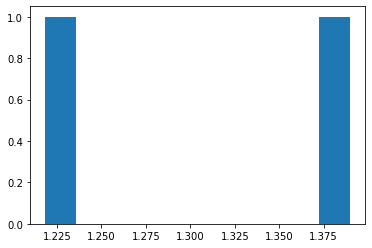

In [39]:
plt.hist(df["val_loss"])

## 3.3 Jednowymairowe zależności


### 3.3.1 Pierwsza warstwa neurony

Text(0.5, 1.0, 'Log-Loss  as function of dropout')

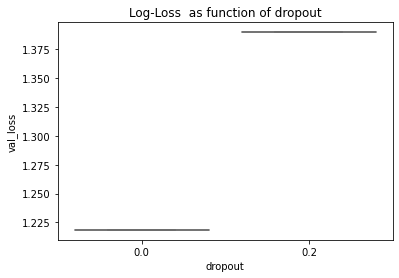

In [40]:
metric = 'dropout'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss  as function of {metric}')

### 3.3.2 Liczba ukrytych neuronów

Text(0.5, 1.0, 'Log-Loss as function of hidden_neuron')

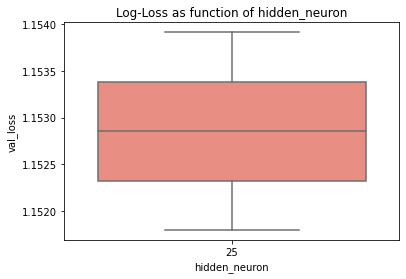

In [41]:
metric = 'hidden_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss as function of {metric}')

### 3.3.3 Liczba ukrytych warstw

Text(0.5, 1.0, 'Validation Loss as function of hidden_layers')

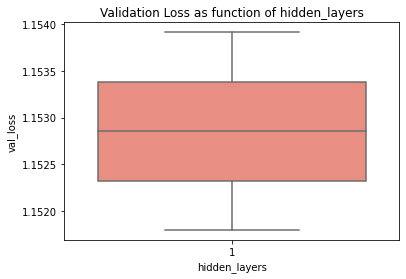

In [42]:
metric = 'hidden_layers'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


### 3.3.4 Batch Size

Text(0.5, 1.0, 'Validation Loss as function of batch_size')

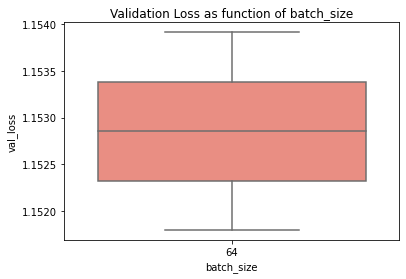

In [43]:
metric = 'batch_size'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


### 3.3.5 kernel_initializer

Text(0.5, 1.0, 'Validation Loss as function of kernel_initializer')

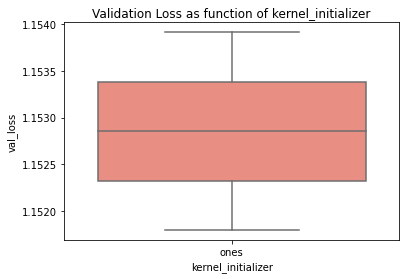

In [44]:
metric = 'kernel_initializer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

### 3.3.6 activation_layer

Text(0.5, 1.0, 'Validation Loss as function of activation_layer')

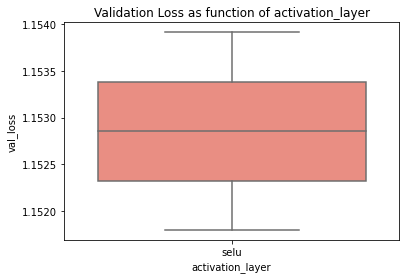

In [45]:
metric = 'activation_layer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

### 3.3.6 Optimizer

Text(0.5, 1.0, 'Validation Loss as function of optimizer')

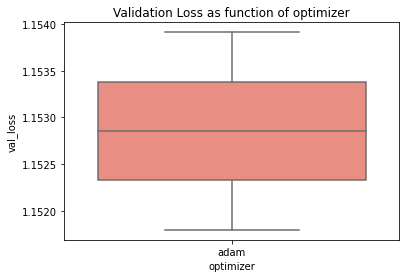

In [46]:
metric = 'optimizer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

### 3.3.7 Batch normalization

Text(0.5, 1.0, 'Validation Loss as function of batc_normalization')

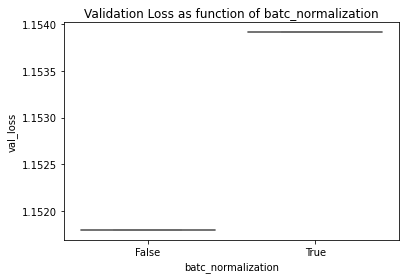

In [47]:
metric = 'batc_normalization'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

Text(0.5, 1.0, 'CI Validation Loss as function of dropout')

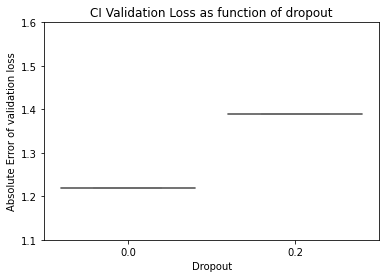

In [3]:
metric = 'dropout'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_ylim([1.1, 1.6]) 
ax.set_ylabel('Absolute Error of validation loss')
ax.set_xlabel('Dropout')
ax.set_title('CI Validation Loss as function of dropout') #ta
